# Portada

INSTITUTO TECNOLOGICO Y DE ESTUDIOS SUPERIORES DE MONTERREY

 CAMPUS PUEBLA

ANALITICA DE DATOS Y HERRAMIENTAS DE INTELIGENCIA ARTIFICIAL II

EVIDENCIA 2

ALUMNO:

Ángel Roberto González Angulo | A01735880

PROFESORES:

Candy Yuridiana Alemán Muñoz

Juan Manuel Ahuactzin Larios

Rigoberto Cerino Jiménez

Alfredo García Suárez

GRUPO:
501

FECHA DE ENTREGA:

28 - 10 - 2024

# Librería de datos y carga de archivos

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import RocCurveDisplay
import os

os.environ["OPENBLAS_NUM_THREADS"] = "8"
os.environ["OMP_NUM_THREADS"] = "8"  # OpenMP
os.environ["MKL_NUM_THREADS"] = "8"  # Intel MKL
os.environ["NUMEXPR_NUM_THREADS"] = "8"

In [2]:
# Lectura de los datos

P8_v3 = pd.read_csv("P08_v03.csv")
P8_v5 = pd.read_csv("P08_v05.csv")
P8_v7 = pd.read_csv("P08_v07.csv")
P8_v9 = pd.read_csv("P08_v09.csv")
P8_v11 = pd.read_csv("P08_v11.csv")

### Distribución de datos y valores nulos

In [3]:
# Compruebo que hay la misma cantidad (distribución) de instancias por cada ventaneo capturado para el paciente 08:

P8_v3[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v5[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v7[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v9[['01_C', '02_A', '03_D', '04_M']].value_counts()
P8_v11[['01_C', '02_A', '03_D', '04_M']].value_counts()

01_C  02_A  03_D  04_M
-1     1    -1    -1      2888
      -1    -1     1      1433
 1    -1    -1    -1       435
-1     1     1    -1       143
 1     1    -1    -1        15
      -1    -1     1         4
-1    -1    -1    -1         2
       1    -1     1         2
Name: count, dtype: int64

In [4]:
# No tenemos valores nulos así que no habrá tratado:

print(P8_v3.isnull().sum().sum())
print(P8_v5.isnull().sum().sum())
print(P8_v7.isnull().sum().sum())
print(P8_v9.isnull().sum().sum())
print(P8_v11.isnull().sum().sum())

0
0
0
0
0


In [5]:
# Añadimos la columna de los ventaneos

P8_v3["TimeWindow"] = "v3"
P8_v5["TimeWindow"] = "v5"
P8_v7["TimeWindow"] = "v7"
P8_v9["TimeWindow"] = "v9"
P8_v11["TimeWindow"] = "v11"

In [6]:
# Concatenar los DataFrames
df = pd.concat([P8_v3, P8_v5, P8_v7, P8_v9, P8_v11], axis=0)
df["User"] = "p08"
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.581437,0.370486,0.445622,0.383397,-1,1,-1,-1,v3,p08
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.626605,0.370919,0.453539,0.388081,-1,1,-1,-1,v3,p08
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.623786,0.424305,0.411762,0.409344,-1,1,-1,-1,v3,p08
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.562665,0.518454,0.400485,0.495307,-1,1,-1,-1,v3,p08
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.529153,0.513277,0.471414,0.521704,-1,1,-1,-1,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.327026,0.462272,0.459193,0.593817,1,-1,-1,-1,v11,p08
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.339617,0.451013,0.469690,0.608083,1,-1,-1,-1,v11,p08
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.335625,0.451241,0.470742,0.599183,1,-1,-1,-1,v11,p08
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.357564,0.424743,0.478960,0.597855,1,-1,-1,-1,v11,p08


In [7]:
# Comprobamos valores dicotómicos

print(df["01_C"].value_counts())
print(df["02_A"].value_counts())
print(df["03_D"].value_counts())
print(df["04_M"].value_counts())

01_C
-1    22340
 1     2270
Name: count, dtype: int64
02_A
 1    15228
-1     9382
Name: count, dtype: int64
03_D
-1    23895
 1      715
Name: count, dtype: int64
04_M
-1    17415
 1     7195
Name: count, dtype: int64


In [8]:
# Por cuestión de entendimiento de código, vamos a cambiar de -1 a 0

df['01_C'] = df['01_C'].replace(-1, 0)
df['02_A'] = df['02_A'].replace(-1, 0)
df['03_D'] = df['03_D'].replace(-1, 0)
df['04_M'] = df['04_M'].replace(-1, 0)

# Vemos nuevamente la distribución de valores para corroborar

print(df["01_C"].value_counts())
print(df["02_A"].value_counts())
print(df["03_D"].value_counts())
print(df["04_M"].value_counts())

01_C
0    22340
1     2270
Name: count, dtype: int64
02_A
1    15228
0     9382
Name: count, dtype: int64
03_D
0    23895
1      715
Name: count, dtype: int64
04_M
0    17415
1     7195
Name: count, dtype: int64


In [9]:
# Comprobamos los ventaneos y la columna final añadida
df["User"].value_counts()
df["TimeWindow"].value_counts()

,count
TimeWindow,
v3,4922
v5,4922
v7,4922
v9,4922
v11,4922


In [10]:
# Vemos la información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24610 entries, 0 to 4921
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Veloc       24610 non-null  float64
 1   Acele       24610 non-null  float64
 2   Des_x       24610 non-null  float64
 3   Des_y       24610 non-null  float64
 4   Des_z       24610 non-null  float64
 5   Presn       24610 non-null  float64
 6   VelPr       24610 non-null  float64
 7   AcePr       24610 non-null  float64
 8   F5EEX       24610 non-null  float64
 9   F6EES       24610 non-null  float64
 10  F8EIX       24610 non-null  float64
 11  F7EIS       24610 non-null  float64
 12  F9EEX       24610 non-null  float64
 13  F10ES       24610 non-null  float64
 14  F11EX       24610 non-null  float64
 15  F12ES       24610 non-null  float64
 16  F13EV       24610 non-null  float64
 17  F14EV       24610 non-null  float64
 18  F17MS       24610 non-null  float64
 19  F18MX       24610 non-null  flo

# ETAPA 1: ANALISIS DE DATOS Y OBJETIVOS

Conjunto de datos:
Cinco archivos CSV divididos en los ventaneos de tiempo, todas las variables son numéricas en los datasets y con las mismas dimensiones, en estas bases de datos se tienen diferentes datos divididos de la siguiente manera:

- Velocidad (Columna 0): Columna destinada a medir la velocidad con la que se usa el aparato.
- Aceleración (Columna 1): Columna destinada a medir la aceleración con la que se usa el aparato.
- Des_x (Columna 2): Desplazamiento en la coordenada x
- Des_y (Columna 3): Desplazamiento en la coordenada y
- Des_z (Columna 4): Desplazamiento en la coordenada z
- Presn (Columna 5): Columna relacionada con la presión
- VelPr (Columna 6): Columna relacionada con la presión
- AcePr (Columna 7): Columna relacionada con la presión
- F (Columnas 8 a 27): Columnas marcadas como los puntos del rostro del paciente (Más información en el artículo que se adjuntó con la base de datos)
- 01_C (Columna 28): Variable Objetivo Cansancio
- 02_A (Columna 29): Variable Objetivo Ansiedad
- 03_D (Columna 30): Variable Objetivo Dolor
- 04_M (Columna 31): Variable Objetivo Motivación


Columnas iniciales creadas (Etiquetas):

- TimeWindow: Los ventaneos de cada base de datos
- User: El paciente

Paciente Seleccionado: Paciente 08

Fecha de obtención de los datos:
09 - 10 - 2024

Conjuntos obtenidos a través de la máquina de apoyo para pacientes con accidentes cerebro vasculares (CVA) y con discapacidad de movimiento donde se realizan actividades con el sistema Gesture Therapy (GT), ambiente virtual para que los pacientes hagan sesiones con diferentes juegos o actividades, el juego mapeado llamado "Avispa". La máquina posee un aparato sensor de presión, gripper y cámara.

Este proyecto tiene por objetivo aplicar lo aprendido durante esta concentración de análitica y herramientas de Inteligencia Artificial impartida por la profesora Candy Yuridiana Alemán Muñoz, Juan Manuel Ahuactzin Larios, Rigoberto Cerino Jiménez y Alfredo García Suárez, principal enfásis en la experimentación de modelos supervisados basados en estadística así como la aplicación de un dashboard en lenguaje de programación Python.

In [11]:
# Número de instancias totales

print(f"El data frame compilado del paciente 08 tiene las siguientes dimensiones: \n {df.shape[0]} Filas \n {df.shape[1]} Columnas")

El data frame compilado del paciente 08 tiene las siguientes dimensiones: 
 24610 Filas 
 34 Columnas


In [12]:
# Instancias que no reportaron alguna emoción: Serán utilizadas para procesos no supervisados

dfNoClassValues = df[(df["01_C"] == 0) & (df["02_A"] == 0) & (df["03_D"] == 0) & (df["04_M"] == 0)]
dfNoClassValues

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
2962,0.187215,0.116591,0.237455,0.184453,0.059185,0.652482,0.160000,0.125000,0.564514,0.398146,...,0.386769,0.576027,0.403027,0.431355,0,0,0,0,v3,p08
3652,0.034589,0.025905,0.039655,0.043919,0.035813,0.141844,0.080000,0.000000,0.476728,0.357497,...,0.418433,0.456661,0.333004,0.296849,0,0,0,0,v3,p08
2962,0.317944,0.136303,0.615017,0.219779,0.102792,0.617021,0.244444,0.225806,0.579101,0.405055,...,0.402431,0.576599,0.394348,0.451068,0,0,0,0,v5,p08
3652,0.074437,0.056875,0.049155,0.066086,0.118550,0.157447,0.111111,0.032258,0.450917,0.296017,...,0.417201,0.455368,0.314670,0.270567,0,0,0,0,v5,p08
2962,0.363830,0.225144,0.544567,0.251853,0.145280,0.592705,0.264151,0.244444,0.554224,0.393806,...,0.399216,0.574096,0.391314,0.407374,0,0,0,0,v7,p08
3652,0.108454,0.047235,0.047875,0.100547,0.141467,0.206687,0.358491,0.311111,0.408426,0.288898,...,0.421298,0.449918,0.308898,0.259674,0,0,0,0,v7,p08
2962,0.390987,0.230748,0.565366,0.240985,0.169792,0.574468,0.250000,0.230769,0.537368,0.399607,...,0.388080,0.562838,0.383741,0.371098,0,0,0,0,v9,p08
3652,0.133237,0.047070,0.056028,0.120707,0.155419,0.243499,0.359375,0.461538,0.393462,0.286412,...,0.429048,0.438591,0.316330,0.257119,0,0,0,0,v9,p08
2962,0.457832,0.313222,0.577332,0.319032,0.197076,0.564797,0.242857,0.220339,0.525596,0.387126,...,0.389945,0.552525,0.373338,0.351001,0,0,0,0,v11,p08
3652,0.153990,0.045786,0.062210,0.155566,0.168406,0.266925,0.328571,0.474576,0.389207,0.283692,...,0.412325,0.447648,0.322546,0.258859,0,0,0,0,v11,p08


In [13]:
# Eliminamos aquellas instancias que no reportaron emociones en el dataframe
filtroNulos = (df["01_C"] == 0) & (df["02_A"] == 0) & (df["03_D"] == 0) & (df["04_M"] == 0)

# Aplicar el filtro para eliminar esas filas
df = df[~filtroNulos]
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.581437,0.370486,0.445622,0.383397,0,1,0,0,v3,p08
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.626605,0.370919,0.453539,0.388081,0,1,0,0,v3,p08
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.623786,0.424305,0.411762,0.409344,0,1,0,0,v3,p08
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.562665,0.518454,0.400485,0.495307,0,1,0,0,v3,p08
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.529153,0.513277,0.471414,0.521704,0,1,0,0,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.327026,0.462272,0.459193,0.593817,1,0,0,0,v11,p08
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.339617,0.451013,0.469690,0.608083,1,0,0,0,v11,p08
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.335625,0.451241,0.470742,0.599183,1,0,0,0,v11,p08
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.357564,0.424743,0.478960,0.597855,1,0,0,0,v11,p08


In [14]:
# Instancias que reportan más de una emoción:

df[(df[['01_C', '02_A', '03_D', '04_M']] == 1).sum(axis=1) >= 2]

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,03_D,04_M,TimeWindow,User
270,0.078784,0.011910,0.059877,0.080516,0.015276,0.425287,0.437500,0.111111,0.384390,0.376984,...,0.571491,0.684126,0.484869,0.768331,1,1,0,0,v3,p08
288,0.085241,0.105911,0.007457,0.177548,0.036395,0.264368,0.125000,0.000000,0.356855,0.318095,...,0.401828,0.610454,0.393709,0.486353,1,1,0,0,v3,p08
354,0.142945,0.157479,0.097903,0.213262,0.043923,0.402299,0.062500,0.111111,0.313996,0.254711,...,0.744244,0.461353,0.283556,0.421381,0,1,1,0,v3,p08
355,0.040839,0.011540,0.032453,0.036394,0.052409,0.379310,0.125000,0.000000,0.318205,0.217635,...,0.648436,0.491062,0.257130,0.410091,0,1,1,0,v3,p08
356,0.052830,0.005599,0.060841,0.019043,0.017671,0.356322,0.062500,0.111111,0.260672,0.137317,...,0.583336,0.515032,0.211255,0.339691,0,1,1,0,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0.219840,0.225870,0.504518,0.205583,0.080871,0.590909,0.281991,0.210386,0.428788,0.356770,...,0.303083,0.374909,0.428067,0.370855,1,0,0,1,v11,p08
4235,0.489103,0.429406,0.829321,0.418768,0.286348,0.431818,0.206411,0.191127,0.367263,0.343874,...,0.329715,0.331504,0.501770,0.370167,1,0,0,1,v11,p08
4578,0.076578,0.093488,0.055197,0.131037,0.026792,0.504132,0.527625,0.422234,0.463416,0.499395,...,0.495160,0.267697,0.442107,0.423586,1,1,0,0,v11,p08
4592,0.146919,0.155824,0.375769,0.124906,0.020488,0.537190,0.263096,0.306680,0.395765,0.324482,...,0.300382,0.434468,0.573484,0.555169,1,1,0,0,v11,p08


## Selección de Objetivo

¿Cómo se manipulará el conjunto de datos para este objetivo?:

Para este análisis, nuestra única columna objetivo será la emoción de "Ansiedad", en primera instancia (Como se demostró en el conteo de los elementos de las columnas), hay un desbalanceo muy evidente para las emociones de "Cansancio", "Dolor" y en menor medida para "Motivación", el paciente 8 presenta la variable ansiedad de forma más equilibrada en los positivos y negativos estando en el juego de la "Avispa" (Actividad que se utilizó para capturar los datos), y este será el primer punto de nuestro análisis.

En el objetivo se determinó mantener las columnas de Motivación y Ansiedad como individuales, mientras que Cansancio, Dolor y aquellos que no presentaron emoción ser guardadas en un nuevo dataframe para realizar experimentos de clasificación no supervisada agrupandolas en las dos emociones principales que ya tenemos. Esto debido a que también debemos tener modelos no supervisados como requisito de evidencias y nos hacen falta instancias para hacer un modelo significativo dentro del análisis por lo que se tomó esa decisión. Sin embargo, sí tomaremos cansancio para modelos individuales y de exploración de clasificadores.

¿Cuántas instancias se eliminarán y cuántes quedarán en el conjunto de datos?

Debido al análisis exploratioro descriptivo de la base de datos, para el paciente 08 se eliminarán 10 instancias del dataframe final dado que son aquellas que no reportan ninguna emoción y debido al tamaño de la muestra, tampoco se van a procesar, quedando así un total de 24,600 instancias iniciales con las cuales trabajar.

¿Hay algún desbalanceo de clases?

Al menos la mitad de las columnas objetivo están desbalanceadas, con Motivación quizá obtengamos mejores resultados también, nuestro principal enfoque será la emoción de "Ansiedad" ya que tenemos más valores equilibrados para evaluar el rendimiento de un próximo modelo.

Objetivo Principal: Obtener un modelo predictivo medio-alto para la emoción de "Ansiedad" experimentando y comprobando a través de métricas así como aplicando el mejor modelo donde se utilicen los datos.

Objetivo Secundario: Analizar la posibilidad de predecir la emoción de ansiedad con muestreo de otros pacientes, conjunto de entrenamiento (Datos del paciente 08) y conjunto de evaluación (Pequeño muestreo de paciente 11)

Requisitos: Modelos de clasificador supervisados para las emociones de Ansiedad, Motivación y Cansancio, luego, procesar aquellas intancias que no presentaban emociones, aquellas de dolor y las de cansancio para obtener un conjunto moderado de datos y agruparlos usando modelos No Supervisados.

# ETAPA 2: EXPERIMENTACIÓN

## Mapas de calor, análisis Estadístico y variables objetivo

In [15]:
# Observamos el comportamiento de dolor y observamos que solo hay dolor cuando se presenta Ansiedad también, dolor tiene un total de 715 instancias
# que a su vez, comparte emoción con Ansiedad

df[['01_C', '02_A', '03_D', '04_M']].value_counts()

01_C  02_A  03_D  04_M
0     1     0     0       14440
      0     0     1        7165
1     0     0     0        2187
0     1     1     0         715
1     1     0     0          63
      0     0     1          20
0     1     0     1          10
Name: count, dtype: int64

In [16]:
# Comprobamos que los valores de dolor siempre están presentes cuando se presenta emoción también
df[df["03_D"] == 1]
df[["02_A","03_D"]][df["03_D"] == 1].value_counts()

# Se elimina la columna de dolor del dataframe (Las instancias se van a almacenar en un dataframe que se concantenará próximamente)
dfDolor = df[df["03_D"] == 1]
dfDolor = dfDolor.drop(columns="03_D")

df = df.drop(columns="03_D")
dfDolor

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,04_M,TimeWindow,User
354,0.142945,0.157479,0.097903,0.213262,0.043923,0.402299,0.062500,0.111111,0.313996,0.254711,...,0.269198,0.744244,0.461353,0.283556,0.421381,0,1,0,v3,p08
355,0.040839,0.011540,0.032453,0.036394,0.052409,0.379310,0.125000,0.000000,0.318205,0.217635,...,0.199661,0.648436,0.491062,0.257130,0.410091,0,1,0,v3,p08
356,0.052830,0.005599,0.060841,0.019043,0.017671,0.356322,0.062500,0.111111,0.260672,0.137317,...,0.173825,0.583336,0.515032,0.211255,0.339691,0,1,0,v3,p08
357,0.065110,0.011952,0.042775,0.075041,0.020494,0.344828,0.000000,0.000000,0.266475,0.129106,...,0.105587,0.593753,0.534936,0.203837,0.404847,0,1,0,v3,p08
358,0.110613,0.053086,0.009325,0.229232,0.026438,0.344828,0.000000,0.000000,0.284497,0.164507,...,0.137302,0.622067,0.527808,0.254336,0.493734,0,1,0,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,0.468868,0.129815,0.268878,0.400390,0.539947,0.429400,0.071429,0.084746,0.518044,0.294780,...,0.404334,0.390556,0.475256,0.316580,0.247123,0,1,0,v11,p08
3154,0.541350,0.100854,0.315846,0.500892,0.548746,0.431335,0.057143,0.084746,0.521282,0.313144,...,0.396080,0.382485,0.475416,0.324457,0.242536,0,1,0,v11,p08
3155,0.694200,0.250729,0.350836,0.602655,0.795185,0.429400,0.057143,0.084746,0.508779,0.308794,...,0.387954,0.386596,0.474078,0.320666,0.240207,0,1,0,v11,p08
3156,0.836356,0.250837,0.327936,0.730781,0.974641,0.431335,0.071429,0.084746,0.507560,0.307312,...,0.385264,0.369298,0.488550,0.319882,0.240943,0,1,0,v11,p08


<Axes: >

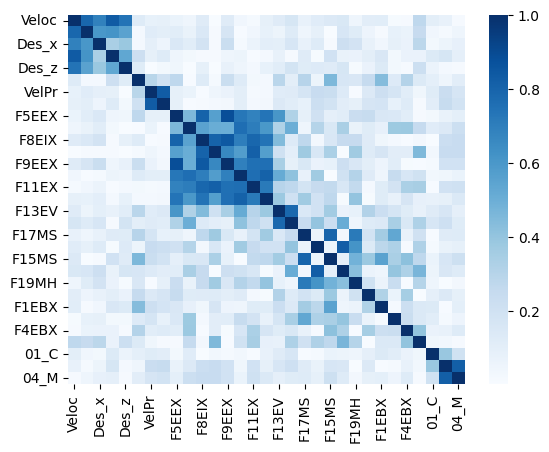

In [17]:
# Mapa de calor general
# Hacemos la matriz de correlación
corrMatrix = abs(df.select_dtypes(np.number).corr())
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(corrMatrix, cmap = 'Blues')
Heat_Map

<Axes: >

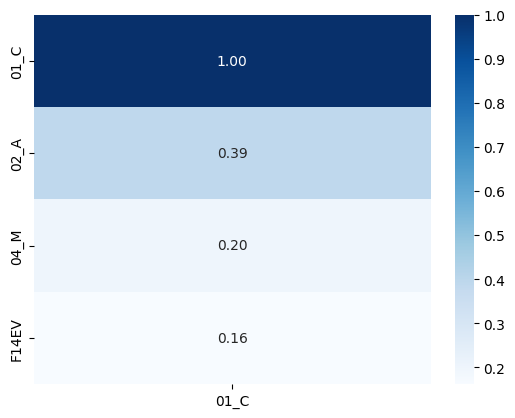

In [18]:
# Mapa de calor para la emoción: Cansancio
CansancioMatrix = abs(df.select_dtypes(np.number).corr()['01_C'])
CansancioMatrix = CansancioMatrix[CansancioMatrix.abs() > 0.15].sort_values(ascending=False).to_frame()
CansancioMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(CansancioMatrix, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map

<Axes: >

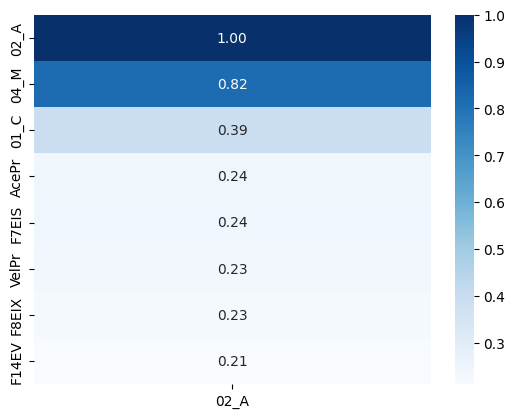

In [19]:
# Mapa de calor para la emoción: Ansiedad
AnsiedadMatrix = abs(df.select_dtypes(np.number).corr()['02_A'])
AnsiedadMatrix = AnsiedadMatrix[AnsiedadMatrix.abs() > 0.20].sort_values(ascending=False).to_frame()
AnsiedadMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(AnsiedadMatrix, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map

<Axes: >

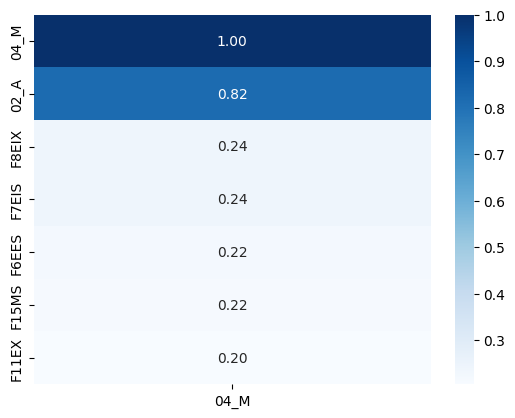

In [20]:
# Mapa de calor para la emoción: Motivación
MotivacionMatrix = abs(df.select_dtypes(np.number).corr()['04_M'])
MotivacionMatrix = MotivacionMatrix[MotivacionMatrix.abs() > 0.20].sort_values(ascending=False).to_frame()
MotivacionMatrix
# Gráficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(MotivacionMatrix, cmap = 'Blues', annot = True, fmt = ".2f")
Heat_Map

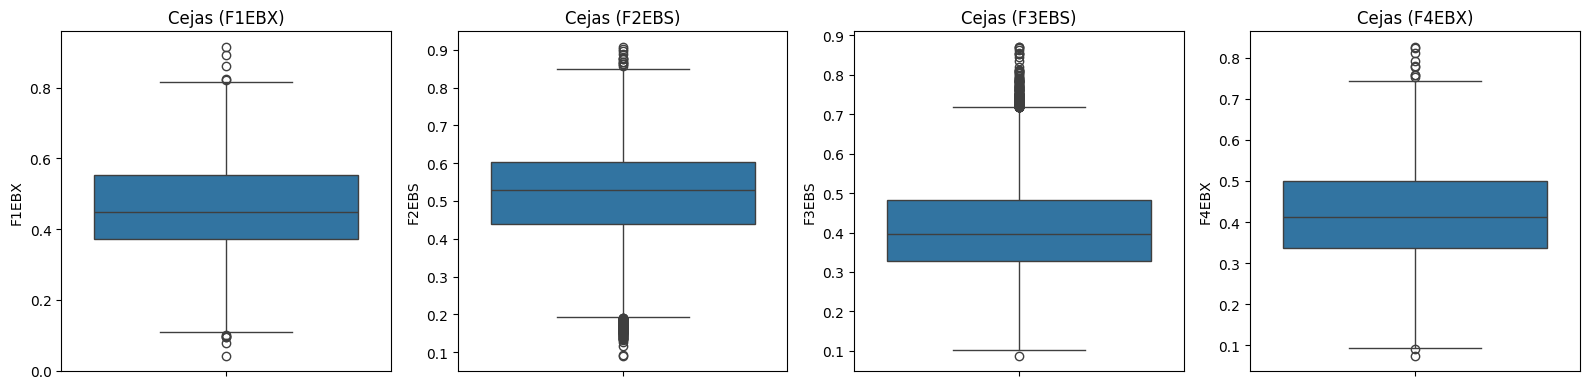

In [21]:
# Creación de boxplots para los puntos de las cejas
plt.figure(figsize=(16, 4))

# Crear un boxplot para cada columna
plt.subplot(1, 4, 1)
sns.boxplot(y=df['F1EBX'])
plt.title('Cejas (F1EBX)')

plt.subplot(1, 4, 2)
sns.boxplot(y=df['F2EBS'])
plt.title('Cejas (F2EBS)')

plt.subplot(1, 4, 3)
sns.boxplot(y=df['F3EBS'])
plt.title('Cejas (F3EBS)')

plt.subplot(1, 4, 4)
sns.boxplot(y=df['F4EBX'])
plt.title('Cejas (F4EBX)')

# Ajuste de layout
plt.tight_layout()
plt.show()

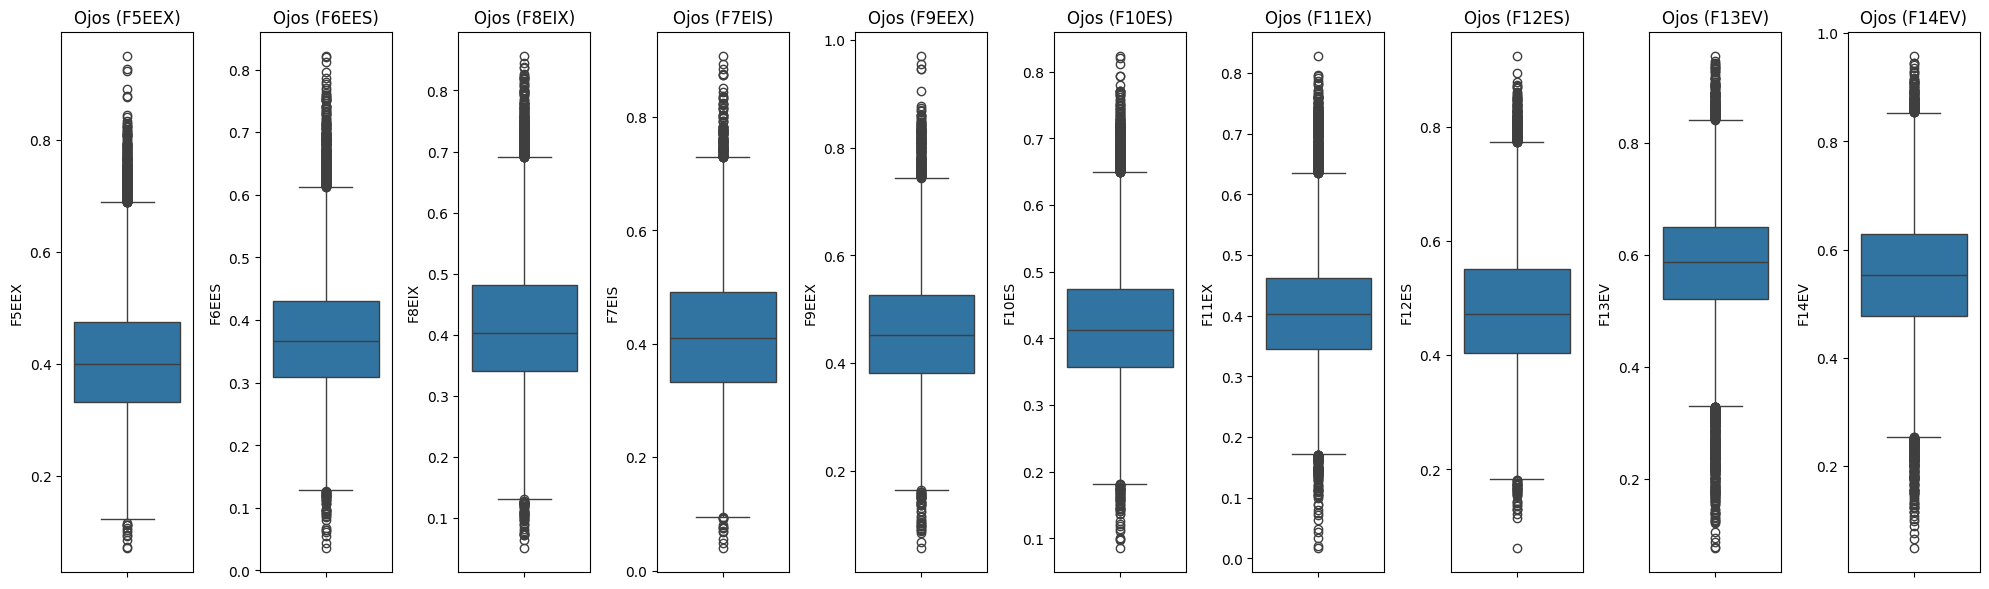

In [22]:
# Creación de boxplots para los puntos de los ojos
plt.figure(figsize=(20, 6))

# Crear un boxplot para cada columna
plt.subplot(1, 10, 1)
sns.boxplot(y=df['F5EEX'])
plt.title('Ojos (F5EEX)')

plt.subplot(1, 10, 2)
sns.boxplot(y=df['F6EES'])
plt.title('Ojos (F6EES)')

plt.subplot(1, 10, 3)
sns.boxplot(y=df['F8EIX'])
plt.title('Ojos (F8EIX)')

plt.subplot(1, 10, 4)
sns.boxplot(y=df['F7EIS'])
plt.title('Ojos (F7EIS)')

plt.subplot(1, 10, 5)
sns.boxplot(y=df['F9EEX'])
plt.title('Ojos (F9EEX)')

plt.subplot(1, 10, 6)
sns.boxplot(y=df['F10ES'])
plt.title('Ojos (F10ES)')

plt.subplot(1, 10, 7)
sns.boxplot(y=df['F11EX'])
plt.title('Ojos (F11EX)')

plt.subplot(1, 10, 8)
sns.boxplot(y=df['F12ES'])
plt.title('Ojos (F12ES)')

plt.subplot(1, 10, 9)
sns.boxplot(y=df['F13EV'])
plt.title('Ojos (F13EV)')

plt.subplot(1, 10, 10)
sns.boxplot(y=df['F14EV'])
plt.title('Ojos (F14EV)')

plt.tight_layout()
plt.show()

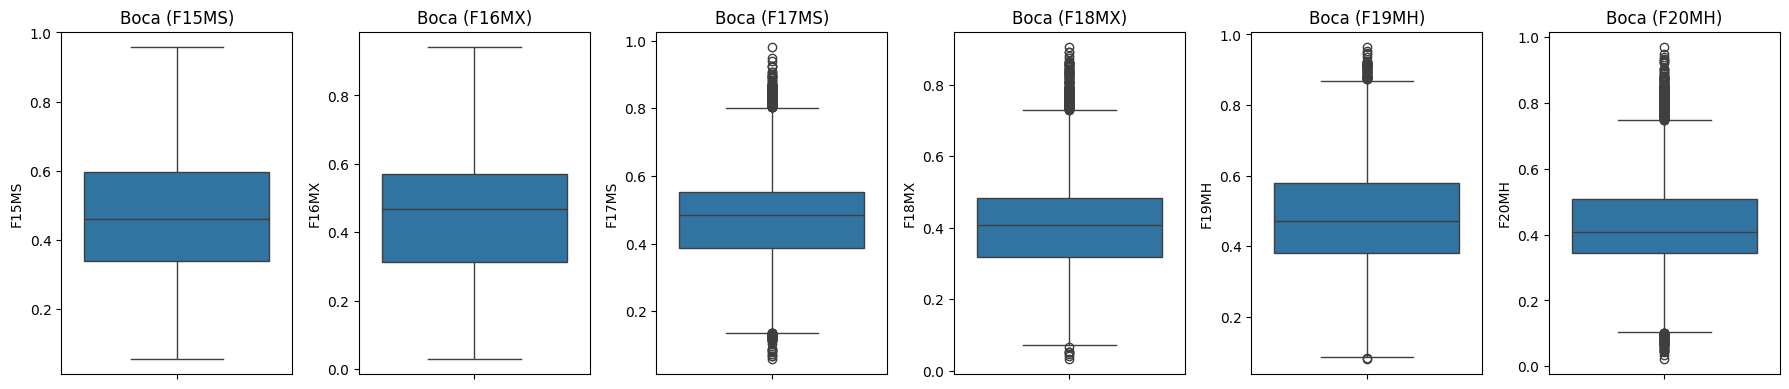

In [23]:
# Creación de boxplots para los puntos de la boca
plt.figure(figsize=(18, 4))

# Crear un boxplot para cada columna en una misma fila
plt.subplot(1, 6, 1)
sns.boxplot(y=df['F15MS'])
plt.title('Boca (F15MS)')

plt.subplot(1, 6, 2)
sns.boxplot(y=df['F16MX'])
plt.title('Boca (F16MX)')

plt.subplot(1, 6, 3)
sns.boxplot(y=df['F17MS'])
plt.title('Boca (F17MS)')

plt.subplot(1, 6, 4)
sns.boxplot(y=df['F18MX'])
plt.title('Boca (F18MX)')

plt.subplot(1, 6, 5)
sns.boxplot(y=df['F19MH'])
plt.title('Boca (F19MH)')

plt.subplot(1, 6, 6)
sns.boxplot(y=df['F20MH'])
plt.title('Boca (F20MH)')

plt.tight_layout()
plt.show()

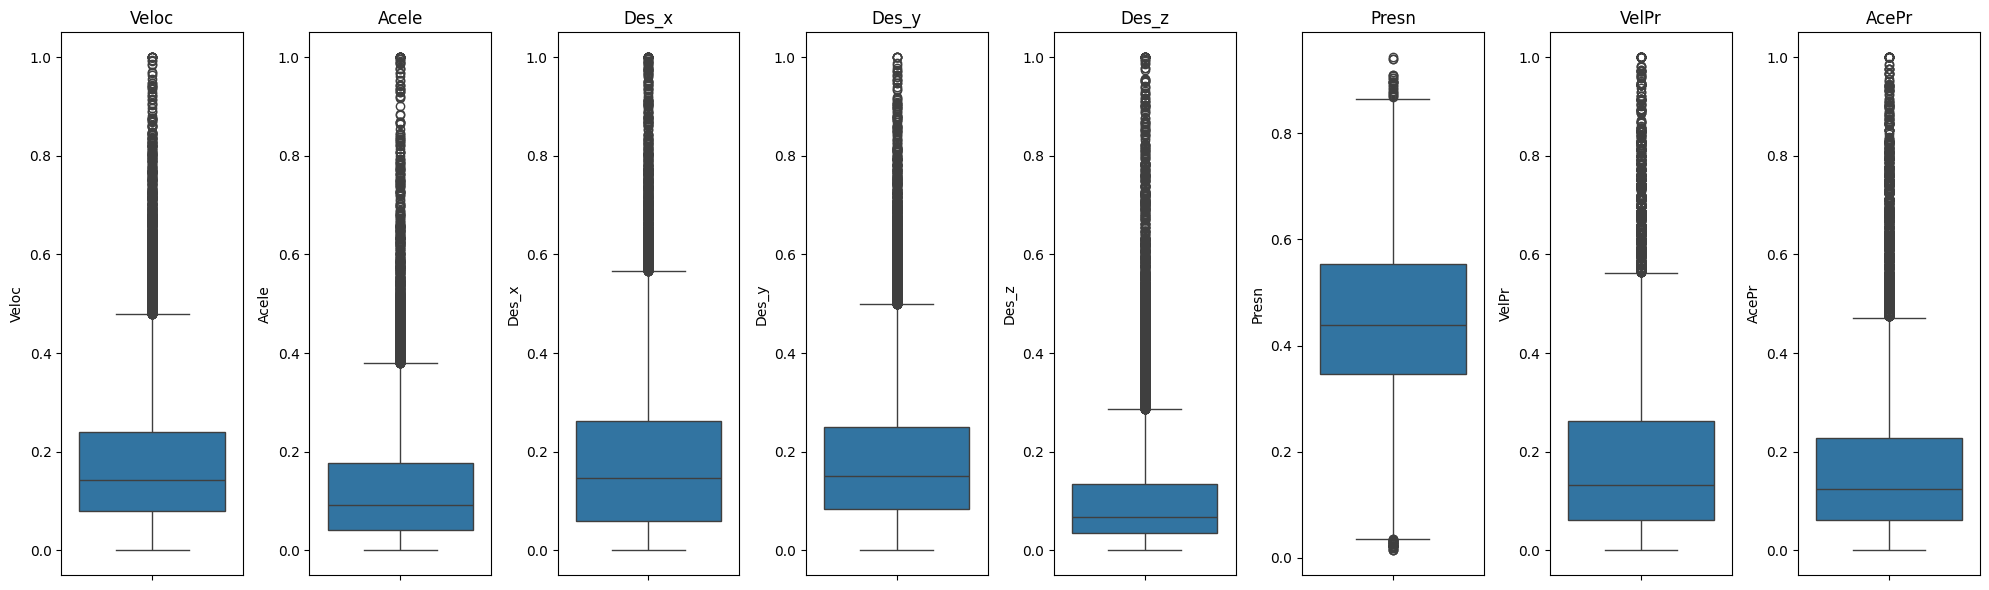

In [24]:
# Creación de boxplots para los puntos de velocidad, aceleración, desplazamientos y presión
plt.figure(figsize=(20, 6))

# Crear un boxplot para cada columna en una misma fila
plt.subplot(1, 8, 1)
sns.boxplot(y=df['Veloc'])
plt.title('Veloc')

plt.subplot(1, 8, 2)
sns.boxplot(y=df['Acele'])
plt.title('Acele')

plt.subplot(1, 8, 3)
sns.boxplot(y=df['Des_x'])
plt.title('Des_x')

plt.subplot(1, 8, 4)
sns.boxplot(y=df['Des_y'])
plt.title('Des_y')

plt.subplot(1, 8, 5)
sns.boxplot(y=df['Des_z'])
plt.title('Des_z')

plt.subplot(1, 8, 6)
sns.boxplot(y=df['Presn'])
plt.title('Presn')

plt.subplot(1, 8, 7)
sns.boxplot(y=df['VelPr'])
plt.title('VelPr')

plt.subplot(1, 8, 8)
sns.boxplot(y=df['AcePr'])
plt.title('AcePr')

plt.tight_layout()
plt.show()

In [25]:
# Ninguna emoción es compartida por las tres emociones a evaluar

df[(df["01_C"] == 1) & (df["02_A"] == 1) & (df["04_M"] == 1)]

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,04_M,TimeWindow,User


In [26]:
# Hacemos filtro para verificar las posibles combinaciones usando cansancio con las demás
df[(df["01_C"] == 1) & (df["02_A"] == 1)] # 63 instancias
df[(df["01_C"] == 1) & (df["04_M"] == 1)] # 20 instancias
print(len(df[df["01_C"] == 1])) # Hacemos un print de los valores totales que resultaron tener la emoción de cansancio sin importar la combinación
# Hacemos filtro para verificar las posibles combinaciones ahora usando Ansiedad
df[(df["02_A"] == 1) & (df["01_C"] == 1)] # 63 instancias
df[(df["02_A"] == 1) & (df["04_M"] == 1)] # 10 instancias
print(len(df[df["02_A"] == 1])) # Hacemos un print de los valores totales que resultaron tener la emoción de ansiedad sin importar la combinación
# Hacemos filtro para verificar las posibles combinaciones ahora usando Motivación
df[(df["04_M"] == 1) & (df["01_C"] == 1)] # 20 instancias
df[(df["04_M"] == 1) & (df["02_A"] == 1)] # 10 instancias
print(len(df[df["04_M"] == 1])) # Hacemos un print de los valores totales que resultaron tener la emoción de Motivación sin importar la combinación

2270
15228
7195


In [27]:
# Combinaciones de emociones
twoC = len(df[(df["01_C"] == 1) & ((df["02_A"] == 1) | (df["04_M"] == 1))])
twoA = len(df[(df["02_A"] == 1) & ((df["01_C"] == 1) | (df["04_M"] == 1))])
twoM = len(df[(df["04_M"] == 1) & ((df["01_C"] == 1) | (df["02_A"] == 1))])

# Combinaciones totales
twoAll = len(df[(df["01_C"] == 1) & (df["02_A"] == 1) | (df["01_C"] == 1) & (df["04_M"] == 1) | (df["02_A"] == 1) & (df["04_M"] == 1)])

print("Total de combinaciones en el dataframe:", twoAll)

# Valores positivos totales en cada emoción
allC = len(df[df["01_C"] == 1])
allA = len(df[df["02_A"] == 1])
allM = len(df[df["04_M"] == 1])
frameAll = allC + allA + allM

print("Total de valores positivos en las emociones dentro del dataframe:", frameAll)

# Representación de las combinaciones en porcentaje respecto a sus totales por emoción
print("Estos valores ya corresponden al % ya que fueron multiplicados x100")
print(round((twoC / allC) * 100, 2), "%")
print(round((twoA / allA) * 100, 2), "%")
print(round((twoM / allM) * 100, 2), "%")

# Proporción total de combinaciones respecto al total de positivos totales
print("Estos valores ya corresponden al % ya que fueron multiplicados x100")
print(round((twoAll / frameAll) * 100, 2), "%")


Total de combinaciones en el dataframe: 93
Total de valores positivos en las emociones dentro del dataframe: 24693
Estos valores ya corresponden al % ya que fueron multiplicados x100
3.66 %
0.48 %
0.42 %
Estos valores ya corresponden al % ya que fueron multiplicados x100
0.38 %


In [28]:
# Estos valores al tener una representatividad mínima, también serán extraídos del data frame original y
# se colocarán junto a los datos de los que no hay emociones así como las pertenecientes a la emoción dolor
dfTwoValues = df[(df["01_C"] == 1) & (df["02_A"] == 1) | (df["01_C"] == 1) & (df["04_M"] == 1) | (df["02_A"] == 1) & (df["04_M"] == 1)]
dfTwoValues

# Aquí solo se hace el filtro para extraer esas filas de mi df original
dfTwoComb = (df["01_C"] == 1) & (df["02_A"] == 1) | (df["01_C"] == 1) & (df["04_M"] == 1) | (df["02_A"] == 1) & (df["04_M"] == 1)
# Aplicar el filtro para eliminar esas filas del DataFrame original
df = df[~dfTwoComb]
df

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,04_M,TimeWindow,User
0,0.046297,0.031977,0.013770,0.072748,0.076657,0.413793,0.000000,0.000000,0.214280,0.152725,...,0.483060,0.581437,0.370486,0.445622,0.383397,0,1,0,v3,p08
1,0.026514,0.003701,0.019456,0.033606,0.028056,0.413793,0.000000,0.000000,0.181755,0.152838,...,0.431814,0.626605,0.370919,0.453539,0.388081,0,1,0,v3,p08
2,0.017964,0.015922,0.019846,0.014718,0.020563,0.402299,0.062500,0.111111,0.206673,0.170527,...,0.432184,0.623786,0.424305,0.411762,0.409344,0,1,0,v3,p08
3,0.027605,0.029702,0.015241,0.038774,0.050284,0.402299,0.125000,0.000000,0.211564,0.176317,...,0.560528,0.562665,0.518454,0.400485,0.495307,0,1,0,v3,p08
4,0.027830,0.029381,0.017582,0.041374,0.044901,0.402299,0.062500,0.111111,0.287563,0.205617,...,0.600766,0.529153,0.513277,0.471414,0.521704,0,1,0,v3,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4917,0.151318,0.178384,0.534149,0.007218,0.036359,0.283058,0.055251,0.075574,0.305819,0.397948,...,0.432989,0.327026,0.462272,0.459193,0.593817,1,0,0,v11,p08
4918,0.151668,0.220211,0.538774,0.010169,0.027665,0.287190,0.055251,0.056315,0.321749,0.403035,...,0.432269,0.339617,0.451013,0.469690,0.608083,1,0,0,v11,p08
4919,0.165101,0.234211,0.583756,0.004332,0.031829,0.291322,0.074146,0.056315,0.324870,0.407332,...,0.427624,0.335625,0.451241,0.470742,0.599183,1,0,0,v11,p08
4920,0.184375,0.197971,0.632832,0.020281,0.036221,0.295455,0.074146,0.075574,0.335353,0.424511,...,0.426189,0.357564,0.424743,0.478960,0.597855,1,0,0,v11,p08


### Lectura de archivo con limpieza de Outliers por método de Rango Intercuartilico (Proceso de Limpieza en otro ipynb con clasificación de Sturges)

In [29]:
# Lectura del mismo archivo pero procesado para manejo de Outliers
df = pd.read_csv("Paciente08.csv")
df = df.drop(columns = ["Unnamed: 0","03_D"])

# Otra vez reemplazamos los valores -1 por 0 por temas de formato
df['01_C'] = df['01_C'].replace(-1, 0)
df['02_A'] = df['02_A'].replace(-1, 0)
df['04_M'] = df['04_M'].replace(-1, 0)

# Aquí solo se hace el filtro para extraer esas filas de mi df original
dfTwoComb = (df["01_C"] == 1) & (df["02_A"] == 1) | (df["01_C"] == 1) & (df["04_M"] == 1) | (df["02_A"] == 1) & (df["04_M"] == 1)
# Aplicar el filtro para eliminar esas filas del DataFrame original
df = df[~dfTwoComb]
df

,TimeWindow,User,01_C,02_A,04_M,Veloc,Acele,Des_x,Des_y,Des_z,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,v11,p08,1,0,0,0.4,0.3,0.534149,0.4,0.2,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,v11,p08,1,0,0,0.4,0.3,0.538774,0.4,0.2,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,v11,p08,1,0,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,v11,p08,1,0,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [30]:
# Verificamos que ahora solo tengamos una emoción única por instancia
df[["01_C","02_A", "04_M"]].value_counts()

01_C  02_A  04_M
0     1     0       15155
      0     1        7165
1     0     0        2187
Name: count, dtype: int64

In [31]:
# Estas fueron nuestros sub - dataframes que se unirán a uno para determinar una emoción u otra con Modelos de clasificación No Supervisados
dfNoClassValues # Aquellos valores sin emoción asignada (10 valores)
dfDolor # Aquellos pertenecientes a la emoción "Dolor" (715 valores)
dfTwoValues # Aquellos que tenían más de una emoción asignada (93 valores)

print("Conteo que contine los valores sin emoción asignada:", len(dfNoClassValues))
print("Conteo que contine los valores pertenecientes a la emoción 'Dolor':", len(dfDolor))
print("Conteo que contine los valores pertenecientes a las instancias con más de una emoción", len(dfTwoValues))
print("Conteo que contine todos los valores eliminados del dataframe original:", len(dfNoClassValues) + len(dfTwoValues))

Conteo que contine los valores sin emoción asignada: 10
Conteo que contine los valores pertenecientes a la emoción 'Dolor': 715
Conteo que contine los valores pertenecientes a las instancias con más de una emoción 93
Conteo que contine todos los valores eliminados del dataframe original: 103


In [32]:
# Concatenamos el dataframe que pasará a los modelos no supervisados
df2 = pd.concat([dfNoClassValues, dfDolor, dfTwoValues], ignore_index=True)
df2 = df2.drop(columns = "03_D") #En el df de valores sin emoción no se eliminó la columna de dolor ya que no se había llegado al punto del análisis
df2

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,04_M,TimeWindow,User
0,0.187215,0.116591,0.237455,0.184453,0.059185,0.652482,0.160000,0.125000,0.564514,0.398146,...,0.346496,0.386769,0.576027,0.403027,0.431355,0,0,0,v3,p08
1,0.034589,0.025905,0.039655,0.043919,0.035813,0.141844,0.080000,0.000000,0.476728,0.357497,...,0.358912,0.418433,0.456661,0.333004,0.296849,0,0,0,v3,p08
2,0.317944,0.136303,0.615017,0.219779,0.102792,0.617021,0.244444,0.225806,0.579101,0.405055,...,0.336900,0.402431,0.576599,0.394348,0.451068,0,0,0,v5,p08
3,0.074437,0.056875,0.049155,0.066086,0.118550,0.157447,0.111111,0.032258,0.450917,0.296017,...,0.364443,0.417201,0.455368,0.314670,0.270567,0,0,0,v5,p08
4,0.363830,0.225144,0.544567,0.251853,0.145280,0.592705,0.264151,0.244444,0.554224,0.393806,...,0.345273,0.399216,0.574096,0.391314,0.407374,0,0,0,v7,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.219840,0.225870,0.504518,0.205583,0.080871,0.590909,0.281991,0.210386,0.428788,0.356770,...,0.450609,0.303083,0.374909,0.428067,0.370855,1,0,1,v11,p08
814,0.489103,0.429406,0.829321,0.418768,0.286348,0.431818,0.206411,0.191127,0.367263,0.343874,...,0.166784,0.329715,0.331504,0.501770,0.370167,1,0,1,v11,p08
815,0.076578,0.093488,0.055197,0.131037,0.026792,0.504132,0.527625,0.422234,0.463416,0.499395,...,0.455714,0.495160,0.267697,0.442107,0.423586,1,1,0,v11,p08
816,0.146919,0.155824,0.375769,0.124906,0.020488,0.537190,0.263096,0.306680,0.395765,0.324482,...,0.393618,0.300382,0.434468,0.573484,0.555169,1,1,0,v11,p08


In [33]:
# Dataframe único con el que pasaremos a la fase de experimentación con modelos supervisados
df

,TimeWindow,User,01_C,02_A,04_M,Veloc,Acele,Des_x,Des_y,Des_z,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,v3,p08,0,1,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,v11,p08,1,0,0,0.4,0.3,0.534149,0.4,0.2,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,v11,p08,1,0,0,0.4,0.3,0.538774,0.4,0.2,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,v11,p08,1,0,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,v11,p08,1,0,0,0.4,0.3,0.400000,0.4,0.2,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [34]:
# Dividimos el dataframe en la emoción cansancio
dfCansancio = df.drop(columns = ["02_A", "04_M","TimeWindow", "User"])
dfCansancio

,01_C,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,1,0.4,0.3,0.534149,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,1,0.4,0.3,0.538774,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [35]:
# Dividimos el dataframe en la emoción Motivación
dfMotivacion = df.drop(columns = ["01_C", "02_A","TimeWindow", "User"])
dfMotivacion

,04_M,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,0,0.4,0.3,0.534149,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,0,0.4,0.3,0.538774,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


In [36]:
# Dividimos el dataframe en la emoción Ansiedad
dfAnsiedad = df.drop(columns = ["01_C", "04_M","TimeWindow", "User"])
dfAnsiedad

,02_A,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,...,F17MS,F18MX,F15MS,F16MX,F19MH,F20MH,F1EBX,F2EBS,F4EBX,F3EBS
0,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
1,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
2,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
3,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.600000
4,1,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.600000,0.8,0.700000,0.7,0.600766,0.7,0.7,0.6,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24595,0,0.4,0.3,0.534149,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622687,0.8,0.705328,0.7,0.600000,0.7,0.7,0.6,0.593817
24596,0,0.4,0.3,0.538774,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.629916,0.8,0.702665,0.7,0.600000,0.7,0.7,0.6,0.608083
24597,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622235,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.599183
24598,0,0.4,0.3,0.400000,0.4,0.2,0.7,0.4,0.4,0.6,...,0.7,0.622909,0.8,0.700000,0.7,0.600000,0.7,0.7,0.6,0.597855


## Experimentación de clasificadores supervisados

### Emoción Cansancio

Matriz de confusión:
[[  24  632]
 [  37 6660]]
VP (Verdaderos Positivos): 24
FP (Falsos Positivos): 37
FN (Falsos Negativos): 632
VN (Verdaderos Negativos): 6660

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6697
           1       0.39      0.04      0.07       656

    accuracy                           0.91      7353
   macro avg       0.65      0.52      0.51      7353
weighted avg       0.87      0.91      0.87      7353



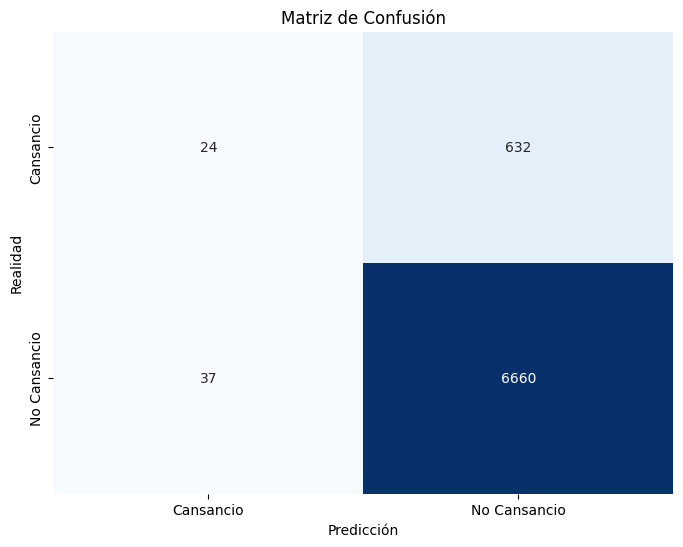

In [37]:
## Regresión Logística
# Declaramos las variables dependientes e independientes

Vars_Indep = dfCansancio.drop(columns=["01_C"])
Var_Dep = dfCansancio['01_C']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=1000)

# Entrenamos el modelo
algoritmo = algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 es Cansancio registrada, 0 es sin Cansancio registrada
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Cansancio", "No Cansancio"],
            yticklabels=["Cansancio", "No Cansancio"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [38]:
# Árbol de decisión

clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(X_train, y_train)
predictArbol=modeloArbol.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictArbol))

# Visualización del árbol
# plt.figure(figsize=(20, 10))  # Ajustamos el tamaño de la figura
# plot_tree(clasificadorArbol, filled=True, feature_names=Vars_Indep.columns, class_names=["Cansancio", "No Cansancio"], rounded=True)
# plt.title("Árbol de Decisión")
# plt.show()

Matriz de confusión:
[[ 283  373]
 [ 260 6437]]
VP (Verdaderos Positivos): 283
FP (Falsos Positivos): 260
FN (Falsos Negativos): 373
VN (Verdaderos Negativos): 6437

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      6697
           1       0.52      0.43      0.47       656

    accuracy                           0.91      7353
   macro avg       0.73      0.70      0.71      7353
weighted avg       0.91      0.91      0.91      7353



Matriz de confusión:
[[ 283  373]
 [ 260 6437]]
VP (Verdaderos Positivos): 283
FP (Falsos Positivos): 260
FN (Falsos Negativos): 373
VN (Verdaderos Negativos): 6437

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6697
           1       0.72      0.40      0.51       656

    accuracy                           0.93      7353
   macro avg       0.83      0.69      0.74      7353
weighted avg       0.92      0.93      0.92      7353



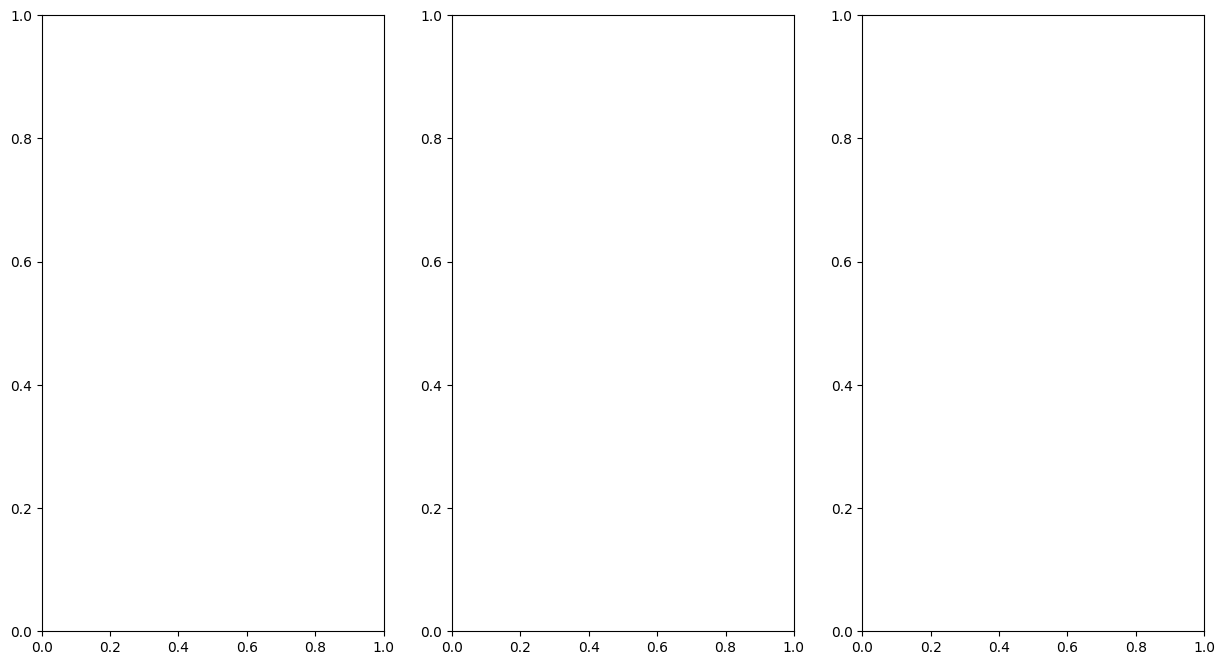

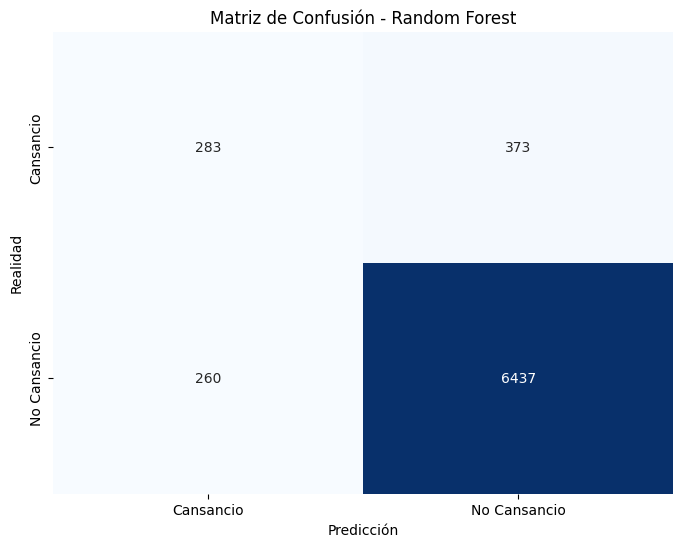

In [39]:
# Random Forest
clasificadorRandom = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
# Parámetros: n_estimators (Número de arboles en mi bosque), max_depth, criterion,

# Modelo #
modeloRandom = clasificadorRandom.fit(X_train, y_train)

# Generar una figura #
#fig = plt.figure(figsize = (15,8))
#
## Subplots #
#ax1 = fig.add_subplot(1,3,1) # Fila, columnas, posición
#ax2 = fig.add_subplot(1,3,2)
#ax3 = fig.add_subplot(1,3,3)

# tree.plot_tree(modeloRandom.estimators_[0], feature_names = Vars_Indep.columns, class_names = ["Cansancio", "No Cansancio"], ax = ax1)
# tree.plot_tree(modeloRandom.estimators_[1], feature_names = Vars_Indep.columns, class_names = ["Cansancio", "No Cansancio"], ax = ax2)
# tree.plot_tree(modeloRandom.estimators_[2], feature_names = Vars_Indep.columns, class_names = ["Cansancio", "No Cansancio"], ax = ax3)

### Clasificación y evaluación
predictForest = modeloRandom.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictForest))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Cansancio", "No Cansancio"],
            yticklabels=["Cansancio", "No Cansancio"])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[ 246  410]
 [ 124 6573]]
VP (Verdaderos Positivos): 246
FP (Falsos Positivos): 124
FN (Falsos Negativos): 410
VN (Verdaderos Negativos): 6573

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      6697
           1       0.66      0.38      0.48       656

    accuracy                           0.93      7353
   macro avg       0.80      0.68      0.72      7353
weighted avg       0.92      0.93      0.92      7353



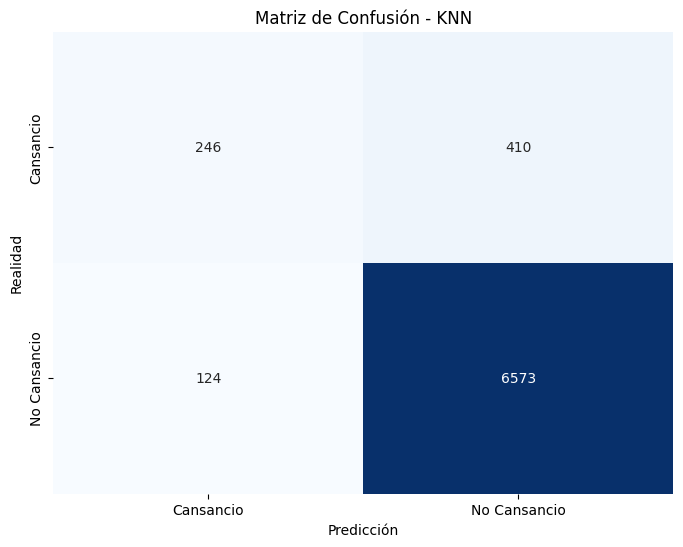

In [40]:
# Knn
clasificadorKnn = KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5

################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(X_train, y_train)
predictKnn=modeloKnn.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictKnn, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictKnn))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Cansancio", "No Cansancio"],
            yticklabels=["Cansancio", "No Cansancio"])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[ 193  463]
 [  32 6665]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.96      6697
           1       0.86      0.29      0.44       656

    accuracy                           0.93      7353
   macro avg       0.90      0.64      0.70      7353
weighted avg       0.93      0.93      0.92      7353



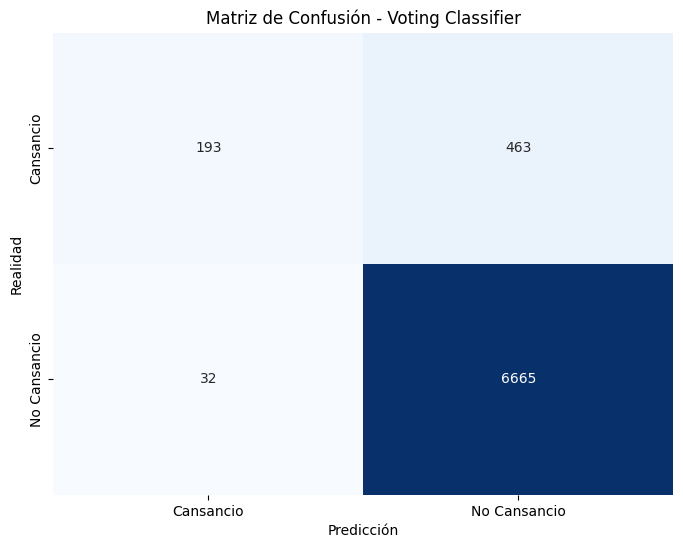

In [41]:
# Sistema de Voto #
Logistic = LogisticRegression(max_iter=1000)
Vecinos = KNeighborsClassifier(n_neighbors=5)
Arbol = DecisionTreeClassifier(max_depth = 7)
Random = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')

### Ensamble ###
clasificadorVoto = VotingClassifier(estimators = [('Logistic', Logistic), ('Vecinos', Vecinos), ("Arbol", Arbol), ('Bosque', Random)], voting = 'soft')

# Entrenamos el modelo de votación
clasificadorVoto.fit(X_train, y_train)
modeloVoto = clasificadorVoto.fit(X_train, y_train)
predictVoto = modeloVoto.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictVoto, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictVoto))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Cansancio", "No Cansancio"],
            yticklabels=["Cansancio", "No Cansancio"])
plt.title('Matriz de Confusión - Voting Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

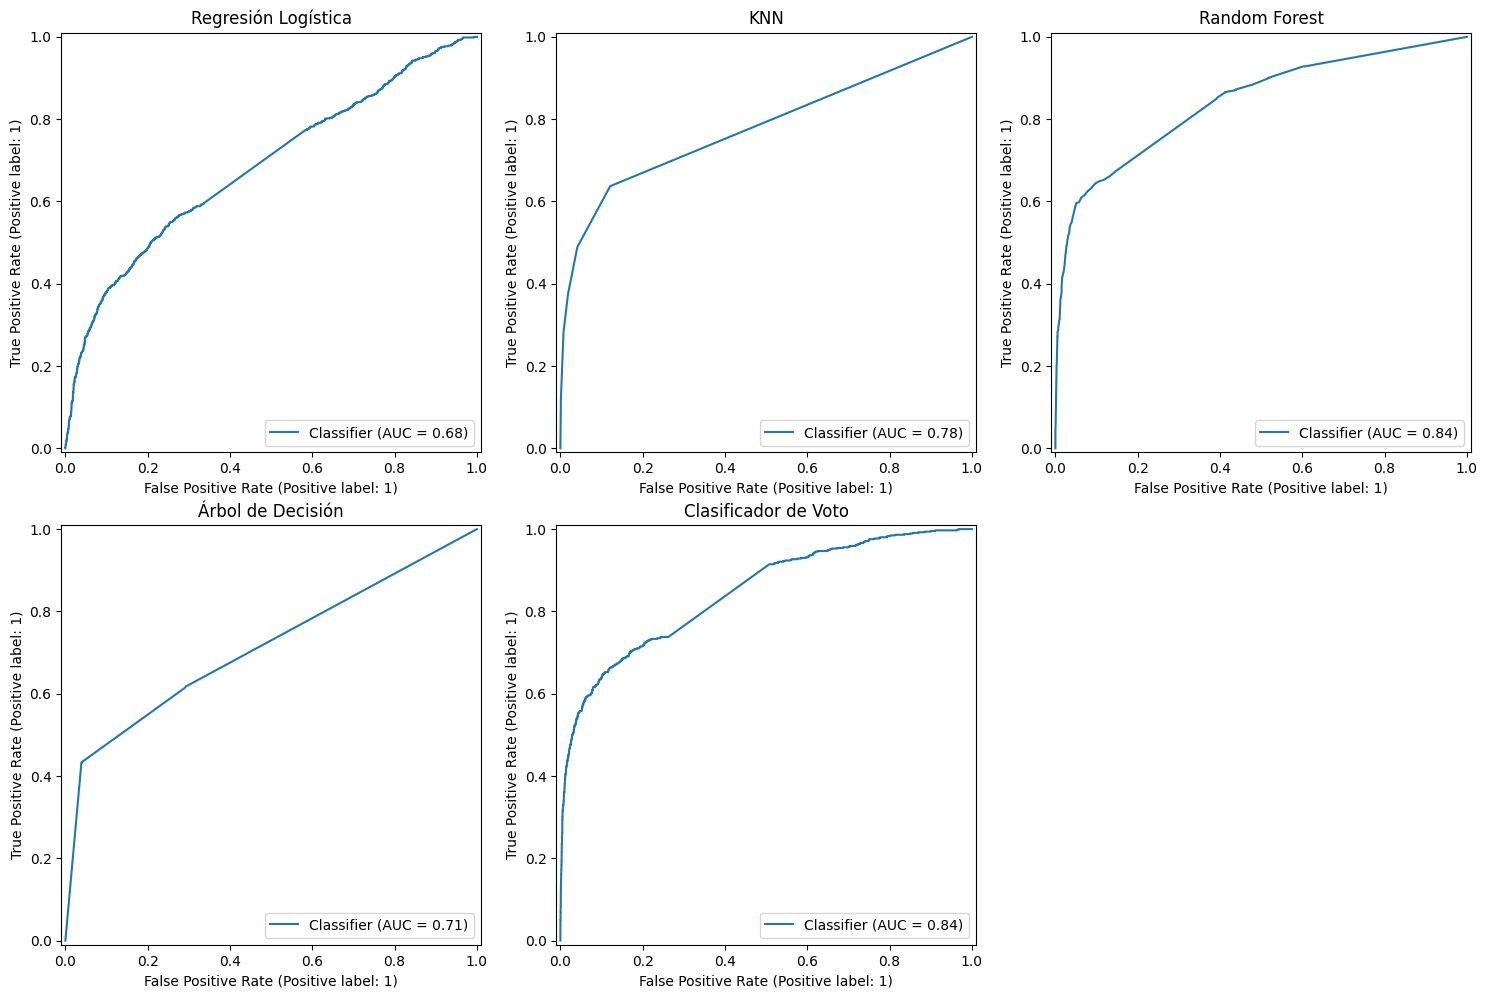

AUC Scores:
Regresión Logística: 0.6842613820531217
KNN: 0.7792167588690969
Random Forest: 0.8413856814299815
Árbol de Decisión: 0.7135442653609005
Clasificador de Voto: 0.8449731313984783


In [42]:
# Obtener las probabilidades de predicción
predictionLogistic = algoritmo.predict_proba(X_test)  # Probabilidades de regresión logística
predictionProbKnn = modeloKnn.predict_proba(X_test)  # Probabilidades de modelo KNN
predictionProbRandom = modeloRandom.predict_proba(X_test)  # Probabilidades de modelo Random Forest
predictionProbArbol = modeloArbol.predict_proba(X_test)  # Probabilidades de modelo Árbol
predictionProbVoto = modeloVoto.predict_proba(X_test)  # Probabilidades de modelo de voto

# Crear figura
fig = plt.figure(figsize=[15, 10])

# Crear subgráficos
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('Regresión Logística')
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title('KNN')
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title('Random Forest')
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title('Árbol de Decisión')
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title('Clasificador de Voto')

# Graficar las curvas ROC
RocCurveDisplay.from_predictions(y_test, predictionLogistic[:, 1], pos_label=1, ax=ax1)
RocCurveDisplay.from_predictions(y_test, predictionProbKnn[:, 1], pos_label=1, ax=ax2)
RocCurveDisplay.from_predictions(y_test, predictionProbRandom[:, 1], pos_label=1, ax=ax3)
RocCurveDisplay.from_predictions(y_test, predictionProbArbol[:, 1], pos_label=1, ax=ax4)
RocCurveDisplay.from_predictions(y_test, predictionProbVoto[:, 1], pos_label=1, ax=ax5)

plt.tight_layout()
plt.show()

# Calcular y mostrar AUC para cada modelo
print("AUC Scores:")
print("Regresión Logística:", roc_auc_score(y_test, predictionLogistic[:, 1]))
print("KNN:", roc_auc_score(y_test, predictionProbKnn[:, 1]))
print("Random Forest:", roc_auc_score(y_test, predictionProbRandom[:, 1]))
print("Árbol de Decisión:", roc_auc_score(y_test, predictionProbArbol[:, 1]))
print("Clasificador de Voto:", roc_auc_score(y_test, predictionProbVoto[:, 1]))

### Emoción Motivación

Matriz de confusión:
[[ 268 1882]
 [ 172 5031]]
VP (Verdaderos Positivos): 268
FP (Falsos Positivos): 172
FN (Falsos Negativos): 1882
VN (Verdaderos Negativos): 5031

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.97      0.83      5203
           1       0.61      0.12      0.21      2150

    accuracy                           0.72      7353
   macro avg       0.67      0.55      0.52      7353
weighted avg       0.69      0.72      0.65      7353



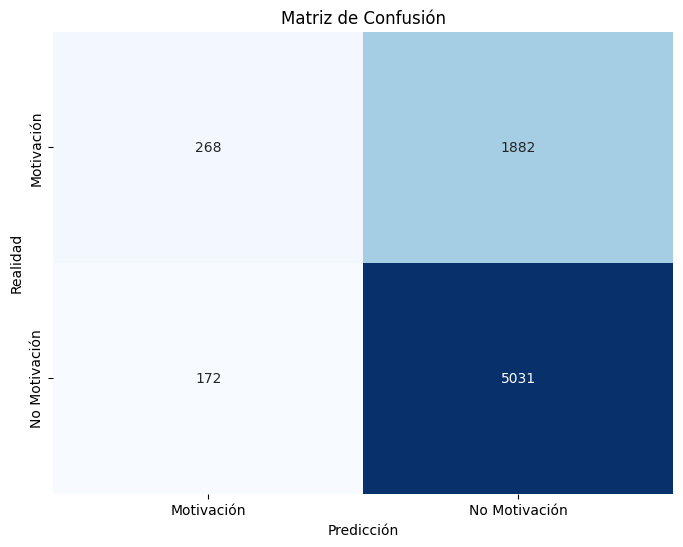

In [43]:
## Regresión Logística
# Declaramos las variables dependientes e independientes

Vars_Indep = dfMotivacion.drop(columns=["04_M"])
Var_Dep = dfMotivacion['04_M']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=1000)

# Entrenamos el modelo
algoritmo = algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 es Motivación registrada, 0 es sin Motivación registrada
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Motivación", "No Motivación"],
            yticklabels=["Motivación", "No Motivación"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

In [44]:
# Árbol de decisión

clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(X_train, y_train)
predictArbol=modeloArbol.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictArbol))

# Visualización del árbol
# plt.figure(figsize=(20, 10))  # Ajustamos el tamaño de la figura
# plot_tree(clasificadorArbol, filled=True, feature_names=Vars_Indep.columns, class_names=["Motivación", "No Motivación"], rounded=True)
# plt.title("Árbol de Decisión")
# plt.show()

Matriz de confusión:
[[1171  979]
 [ 603 4600]]
VP (Verdaderos Positivos): 1171
FP (Falsos Positivos): 603
FN (Falsos Negativos): 979
VN (Verdaderos Negativos): 4600

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      5203
           1       0.66      0.54      0.60      2150

    accuracy                           0.78      7353
   macro avg       0.74      0.71      0.73      7353
weighted avg       0.78      0.78      0.78      7353



Matriz de confusión:
[[1171  979]
 [ 603 4600]]
VP (Verdaderos Positivos): 1171
FP (Falsos Positivos): 603
FN (Falsos Negativos): 979
VN (Verdaderos Negativos): 4600

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      5203
           1       0.72      0.56      0.63      2150

    accuracy                           0.81      7353
   macro avg       0.78      0.73      0.75      7353
weighted avg       0.80      0.81      0.80      7353



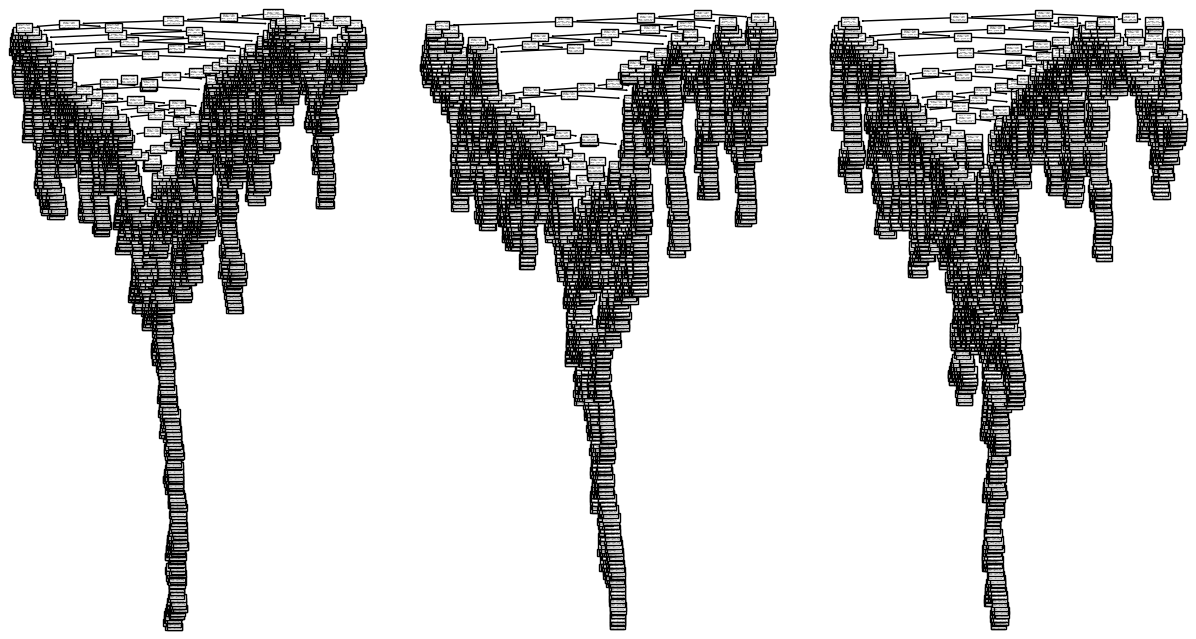

In [45]:
# Random Forest
clasificadorRandom = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
# Parámetros: n_estimators (Número de arboles en mi bosque), max_depth, criterion,

# Modelo #
modeloRandom = clasificadorRandom.fit(X_train, y_train)

# Generar una figura #
fig = plt.figure(figsize = (15,8))

# Subplots #
ax1 = fig.add_subplot(1,3,1) # Fila, columnas, posición
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

tree.plot_tree(modeloRandom.estimators_[0], feature_names = Vars_Indep.columns, class_names = ["Motivación", "No Motivación"], ax = ax1)
tree.plot_tree(modeloRandom.estimators_[1], feature_names = Vars_Indep.columns, class_names = ["Motivación", "No Motivación"], ax = ax2)
tree.plot_tree(modeloRandom.estimators_[2], feature_names = Vars_Indep.columns, class_names = ["Motivación", "No Motivación"], ax = ax3)

### Clasificación y evaluación
predictForest = modeloRandom.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictForest))

# Visualización de la matriz de confusión
# plt.figure(figsize=(8, 6))
# sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
#             xticklabels=["Motivación", "No Motivación"],
#             yticklabels=["Motivación", "No Motivación"])
# plt.title('Matriz de Confusión - Random Forest')
# plt.xlabel('Predicción')
# plt.ylabel('Realidad')
# plt.show()

Matriz de confusión:
[[1097 1053]
 [ 443 4760]]
VP (Verdaderos Positivos): 1097
FP (Falsos Positivos): 443
FN (Falsos Negativos): 1053
VN (Verdaderos Negativos): 4760

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      5203
           1       0.71      0.51      0.59      2150

    accuracy                           0.80      7353
   macro avg       0.77      0.71      0.73      7353
weighted avg       0.79      0.80      0.79      7353



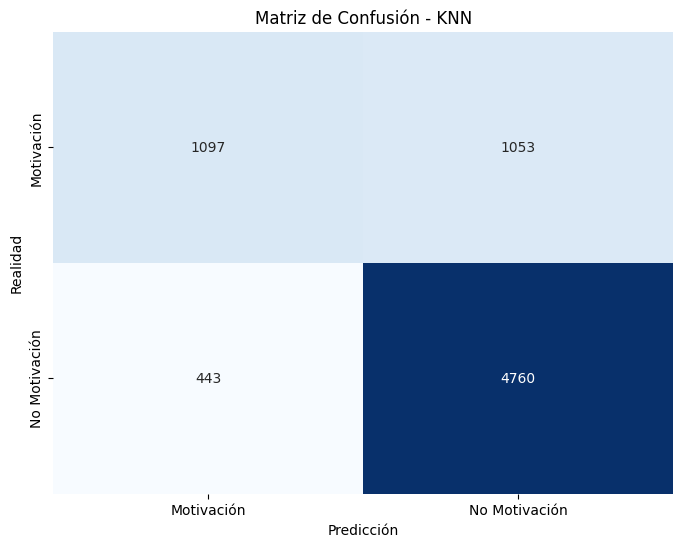

In [46]:
# Knn
clasificadorKnn = KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5

################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(X_train, y_train)
predictKnn=modeloKnn.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictKnn, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictKnn))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Motivación", "No Motivación"],
            yticklabels=["Motivación", "No Motivación"])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[ 955 1195]
 [ 182 5021]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      5203
           1       0.84      0.44      0.58      2150

    accuracy                           0.81      7353
   macro avg       0.82      0.70      0.73      7353
weighted avg       0.82      0.81      0.79      7353



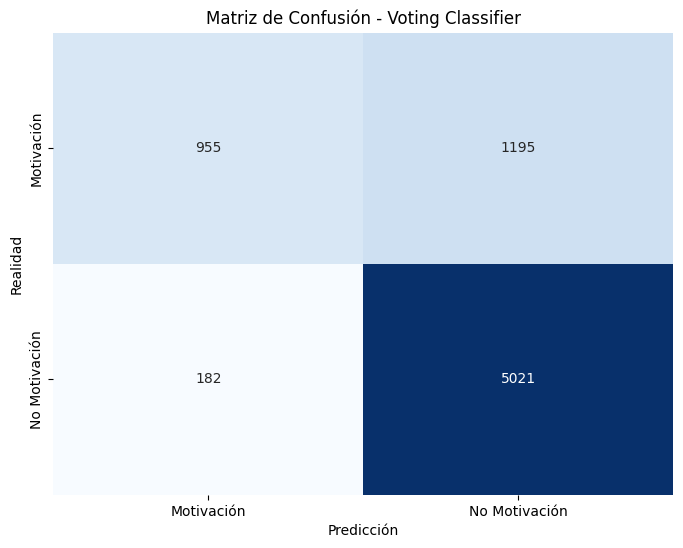

In [47]:
# Sistema de Voto #
Logistic = LogisticRegression(max_iter=1000)
Vecinos = KNeighborsClassifier(n_neighbors=5)
Arbol = DecisionTreeClassifier(max_depth = 7)
Random = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')

### Ensamble ###
clasificadorVoto = VotingClassifier(estimators = [('Logistic', Logistic), ('Vecinos', Vecinos), ("Arbol", Arbol), ('Bosque', Random)], voting = 'soft')

# Entrenamos el modelo de votación
clasificadorVoto.fit(X_train, y_train)
modeloVoto = clasificadorVoto.fit(X_train, y_train)
predictVoto = modeloVoto.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictVoto, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictVoto))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Motivación", "No Motivación"],
            yticklabels=["Motivación", "No Motivación"])
plt.title('Matriz de Confusión - Voting Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

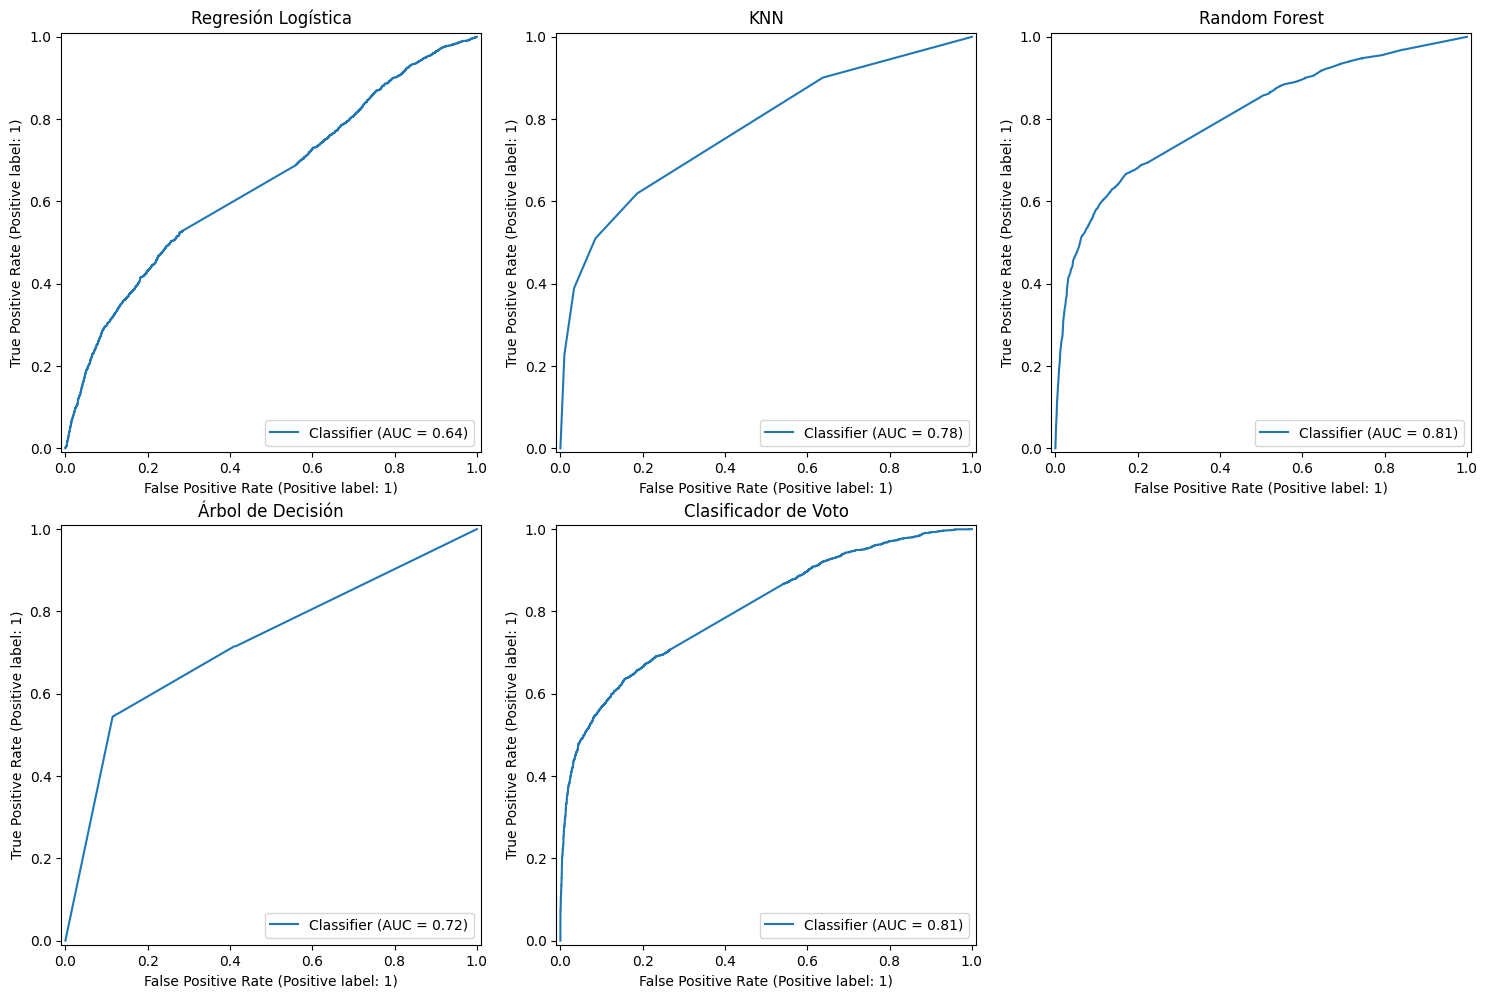

AUC Scores:
Regresión Logística: 0.6446811544323713
KNN: 0.7763002114164905
Random Forest: 0.8072568598617077
Árbol de Decisión: 0.7225433001533105
Clasificador de Voto: 0.8064310393377702


In [48]:
# Obtener las probabilidades de predicción
predictionLogistic = algoritmo.predict_proba(X_test)  # Probabilidades de regresión logística
predictionProbKnn = modeloKnn.predict_proba(X_test)  # Probabilidades de modelo KNN
predictionProbRandom = modeloRandom.predict_proba(X_test)  # Probabilidades de modelo Random Forest
predictionProbArbol = modeloArbol.predict_proba(X_test)  # Probabilidades de modelo Árbol
predictionProbVoto = modeloVoto.predict_proba(X_test)  # Probabilidades de modelo de voto

# Crear figura
fig = plt.figure(figsize=[15, 10])

# Crear subgráficos
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('Regresión Logística')
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title('KNN')
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title('Random Forest')
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title('Árbol de Decisión')
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title('Clasificador de Voto')

# Graficar las curvas ROC
RocCurveDisplay.from_predictions(y_test, predictionLogistic[:, 1], pos_label=1, ax=ax1)
RocCurveDisplay.from_predictions(y_test, predictionProbKnn[:, 1], pos_label=1, ax=ax2)
RocCurveDisplay.from_predictions(y_test, predictionProbRandom[:, 1], pos_label=1, ax=ax3)
RocCurveDisplay.from_predictions(y_test, predictionProbArbol[:, 1], pos_label=1, ax=ax4)
RocCurveDisplay.from_predictions(y_test, predictionProbVoto[:, 1], pos_label=1, ax=ax5)

plt.tight_layout()
plt.show()

# Calcular y mostrar AUC para cada modelo
print("AUC Scores:")
print("Regresión Logística:", roc_auc_score(y_test, predictionLogistic[:, 1]))
print("KNN:", roc_auc_score(y_test, predictionProbKnn[:, 1]))
print("Random Forest:", roc_auc_score(y_test, predictionProbRandom[:, 1]))
print("Árbol de Decisión:", roc_auc_score(y_test, predictionProbArbol[:, 1]))
print("Clasificador de Voto:", roc_auc_score(y_test, predictionProbVoto[:, 1]))

### Emoción Ansiedad

Matriz de confusión:
[[4238  309]
 [2127  679]]
VP (Verdaderos Positivos): 4238
FP (Falsos Positivos): 2127
FN (Falsos Negativos): 309
VN (Verdaderos Negativos): 679

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.69      0.24      0.36      2806
           1       0.67      0.93      0.78      4547

    accuracy                           0.67      7353
   macro avg       0.68      0.59      0.57      7353
weighted avg       0.67      0.67      0.62      7353



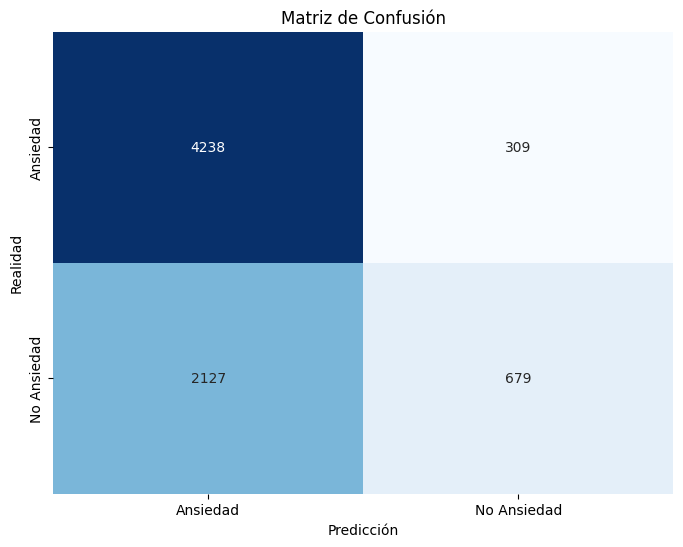

In [49]:
## Regresión Logística
# Declaramos las variables dependientes e independientes

Vars_Indep = dfAnsiedad.drop(columns=["02_A"])
Var_Dep = dfAnsiedad['02_A']

# Redefinimos las variables
X = Vars_Indep
y = Var_Dep

# Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3, stratify= y)

# Se escalan todos los datos
escalar = StandardScaler()

# Para realizar el escalamiento de las variables "x" tanto de entrenamiento como de prueba, utilizaremos fit_transform

X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

# Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression(max_iter=1000)

# Entrenamos el modelo
algoritmo = algoritmo.fit(X_train, y_train)

# Realizamos una predicción
y_pred = algoritmo.predict(X_test)
y_pred

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1, 0])  # 1 es Ansiedad registrada, 0 es sin Ansiedad registrada
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Ansiedad", "No Ansiedad"],
            yticklabels=["Ansiedad", "No Ansiedad"])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[3882  665]
 [1219 1587]]
VP (Verdaderos Positivos): 3882
FP (Falsos Positivos): 1219
FN (Falsos Negativos): 665
VN (Verdaderos Negativos): 1587

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.57      0.63      2806
           1       0.76      0.85      0.80      4547

    accuracy                           0.74      7353
   macro avg       0.73      0.71      0.72      7353
weighted avg       0.74      0.74      0.74      7353



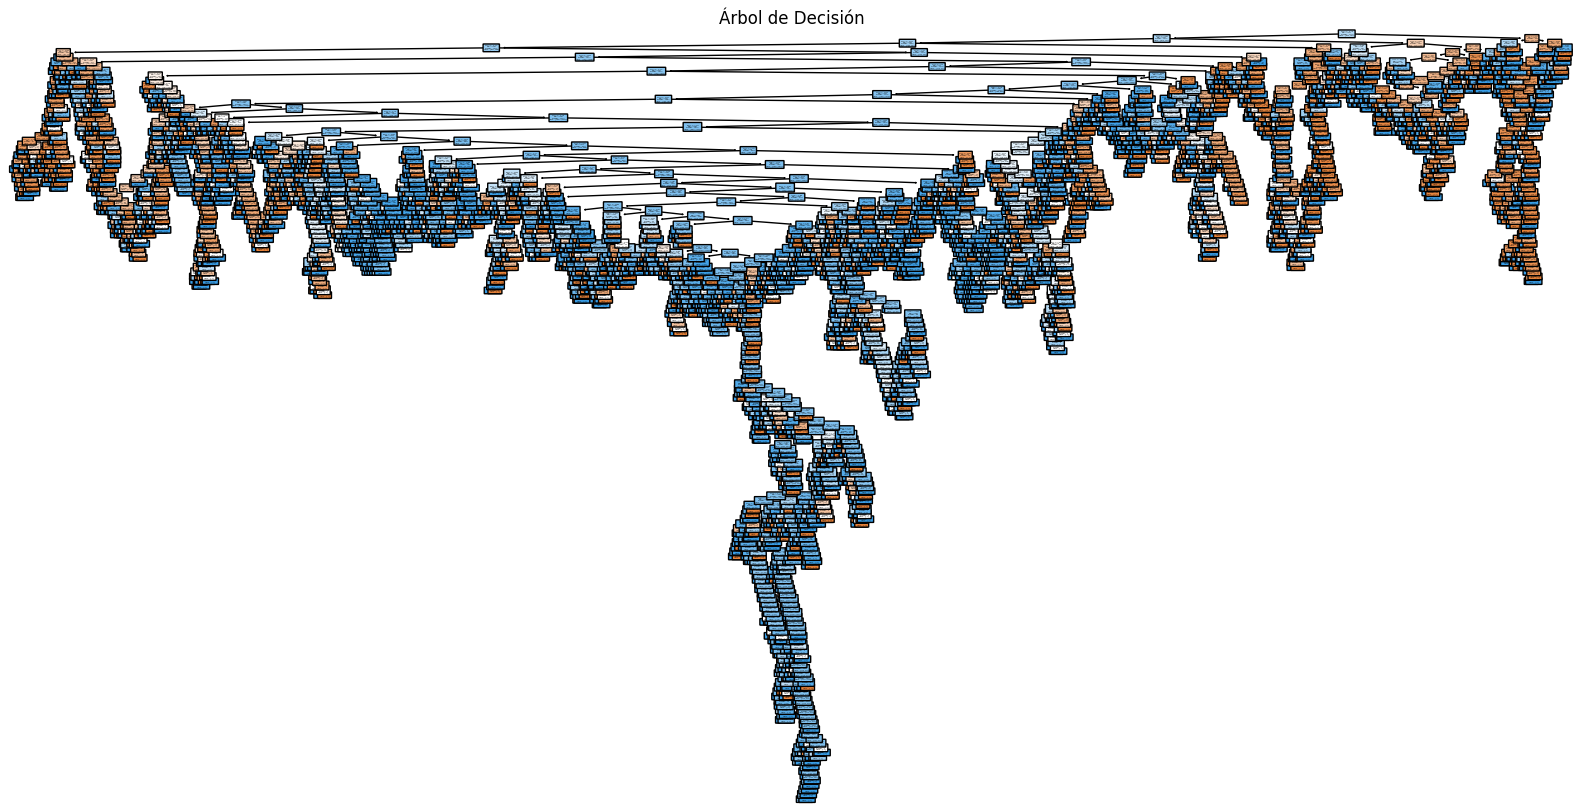

In [50]:
# Árbol de decisión

clasificadorArbol = DecisionTreeClassifier()

################## Modelo ###########################
modeloArbol = clasificadorArbol.fit(X_train, y_train)
predictArbol=modeloArbol.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictArbol))

# Visualización del árbol
plt.figure(figsize=(20, 10))  # Ajustamos el tamaño de la figura
plot_tree(clasificadorArbol, filled=True, feature_names=Vars_Indep.columns, class_names=["Motivación", "No Motivación"], rounded=True)
plt.title("Árbol de Decisión")
plt.show()

Matriz de confusión:
[[3882  665]
 [1219 1587]]
VP (Verdaderos Positivos): 3882
FP (Falsos Positivos): 1219
FN (Falsos Negativos): 665
VN (Verdaderos Negativos): 1587

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.75      0.60      0.66      2806
           1       0.78      0.88      0.83      4547

    accuracy                           0.77      7353
   macro avg       0.77      0.74      0.75      7353
weighted avg       0.77      0.77      0.76      7353



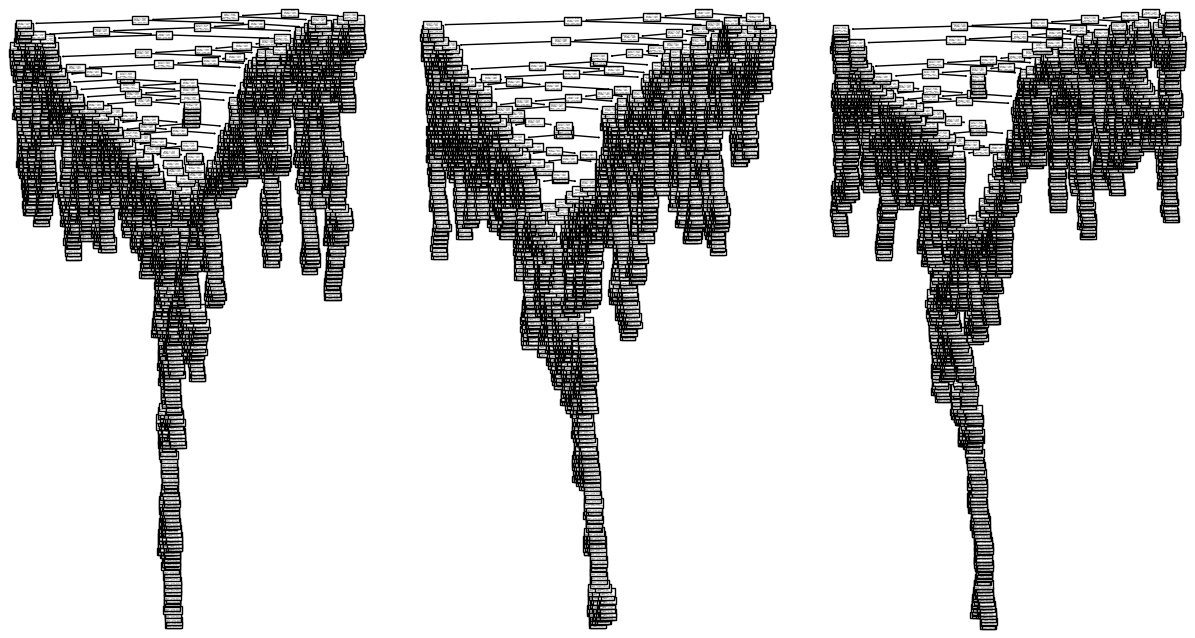

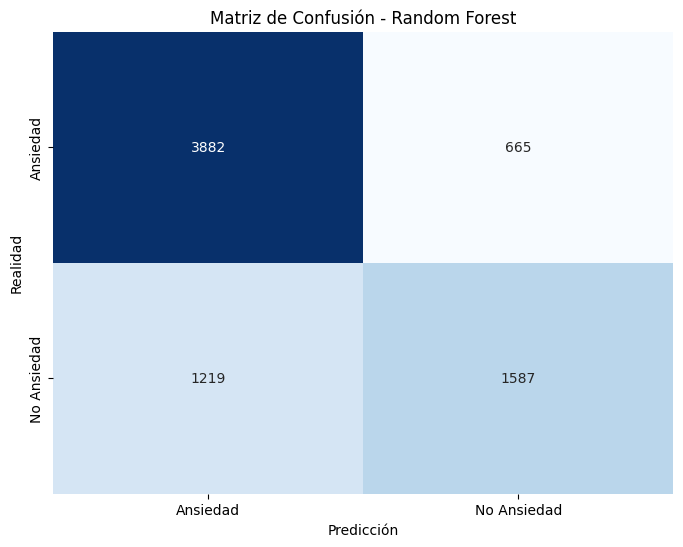

In [51]:
# Random Forest
clasificadorRandom = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')
# Parámetros: n_estimators (Número de arboles en mi bosque), max_depth, criterion,

# Modelo #
modeloRandom = clasificadorRandom.fit(X_train, y_train)

# Generar una figura #
# fig = plt.figure(figsize = (15,8))
#
# # Subplots #
# ax1 = fig.add_subplot(1,3,1) # Fila, columnas, posición
# ax2 = fig.add_subplot(1,3,2)
# ax3 = fig.add_subplot(1,3,3)

# tree.plot_tree(modeloRandom.estimators_[0], feature_names = Vars_Indep.columns, class_names = ["Ansiedad", "No Ansiedad"], ax = ax1)
# tree.plot_tree(modeloRandom.estimators_[1], feature_names = Vars_Indep.columns, class_names = ["Ansiedad", "No Ansiedad"], ax = ax2)
# tree.plot_tree(modeloRandom.estimators_[2], feature_names = Vars_Indep.columns, class_names = ["Ansiedad", "No Ansiedad"], ax = ax3)

### Clasificación y evaluación
predictForest = modeloRandom.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictArbol, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictForest))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Ansiedad", "No Ansiedad"],
            yticklabels=["Ansiedad", "No Ansiedad"])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[3953  594]
 [1249 1557]]
VP (Verdaderos Positivos): 3953
FP (Falsos Positivos): 1249
FN (Falsos Negativos): 594
VN (Verdaderos Negativos): 1557

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.72      0.55      0.63      2806
           1       0.76      0.87      0.81      4547

    accuracy                           0.75      7353
   macro avg       0.74      0.71      0.72      7353
weighted avg       0.75      0.75      0.74      7353



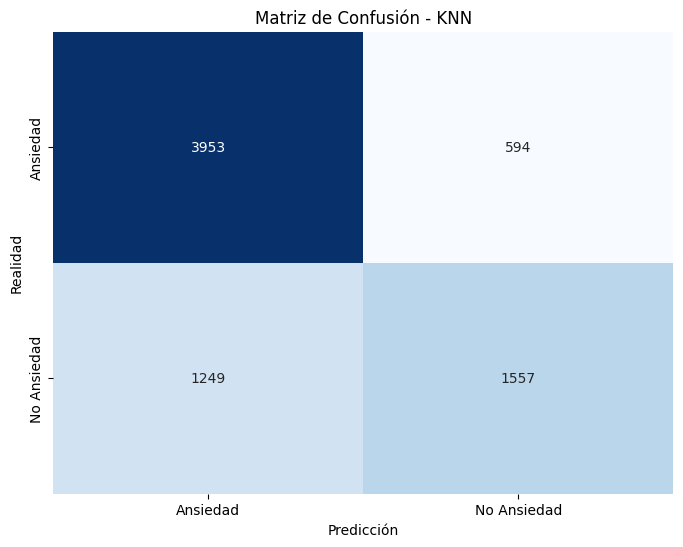

In [52]:
# Knn
clasificadorKnn = KNeighborsClassifier(n_neighbors=5) #Por defecto distancia euclideana y k=5

################## Modelo ###########################
modeloKnn = clasificadorKnn.fit(X_train, y_train)
predictKnn=modeloKnn.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictKnn, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Extraer VP, FP, FN, VN
VP = matriz[0, 0]  # Verdaderos Positivos
FP = matriz[1, 0]  # Falsos Positivos
FN = matriz[0, 1]  # Falsos Negativos
VN = matriz[1, 1]  # Verdaderos Negativos

# Imprimir con descripción
print(f"VP (Verdaderos Positivos): {VP}")
print(f"FP (Falsos Positivos): {FP}")
print(f"FN (Falsos Negativos): {FN}")
print(f"VN (Verdaderos Negativos): {VN}")

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictKnn))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Ansiedad", "No Ansiedad"],
            yticklabels=["Ansiedad", "No Ansiedad"])
plt.title('Matriz de Confusión - KNN')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

Matriz de confusión:
[[4161  386]
 [1333 1473]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      2806
           1       0.76      0.92      0.83      4547

    accuracy                           0.77      7353
   macro avg       0.77      0.72      0.73      7353
weighted avg       0.77      0.77      0.75      7353



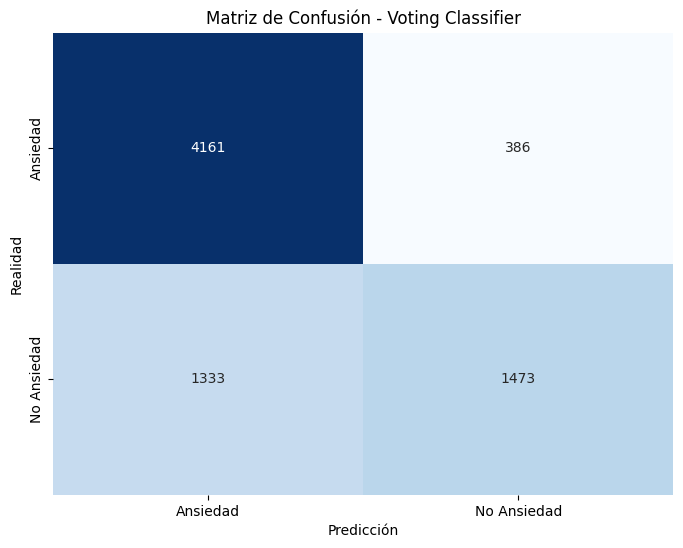

In [53]:
# Sistema de Voto #
Logistic = LogisticRegression(max_iter=1000)
Vecinos = KNeighborsClassifier(n_neighbors=5)
Arbol = DecisionTreeClassifier(max_depth = 7)
Random = RandomForestClassifier(n_estimators = 80, criterion = 'entropy')

### Ensamble ###
clasificadorVoto = VotingClassifier(estimators = [('Logistic', Logistic), ('Vecinos', Vecinos), ("Arbol", Arbol), ('Bosque', Random)], voting = 'soft')

# Entrenamos el modelo de votación
clasificadorVoto.fit(X_train, y_train)
modeloVoto = clasificadorVoto.fit(X_train, y_train)
predictVoto = modeloVoto.predict(X_test)

# Verificamos la matriz de confusión
matriz = confusion_matrix(y_test, predictVoto, labels=[1, 0])
print("Matriz de confusión:")
print(matriz)

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predictVoto))

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Ansiedad", "No Ansiedad"],
            yticklabels=["Ansiedad", "No Ansiedad"])
plt.title('Matriz de Confusión - Voting Classifier')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

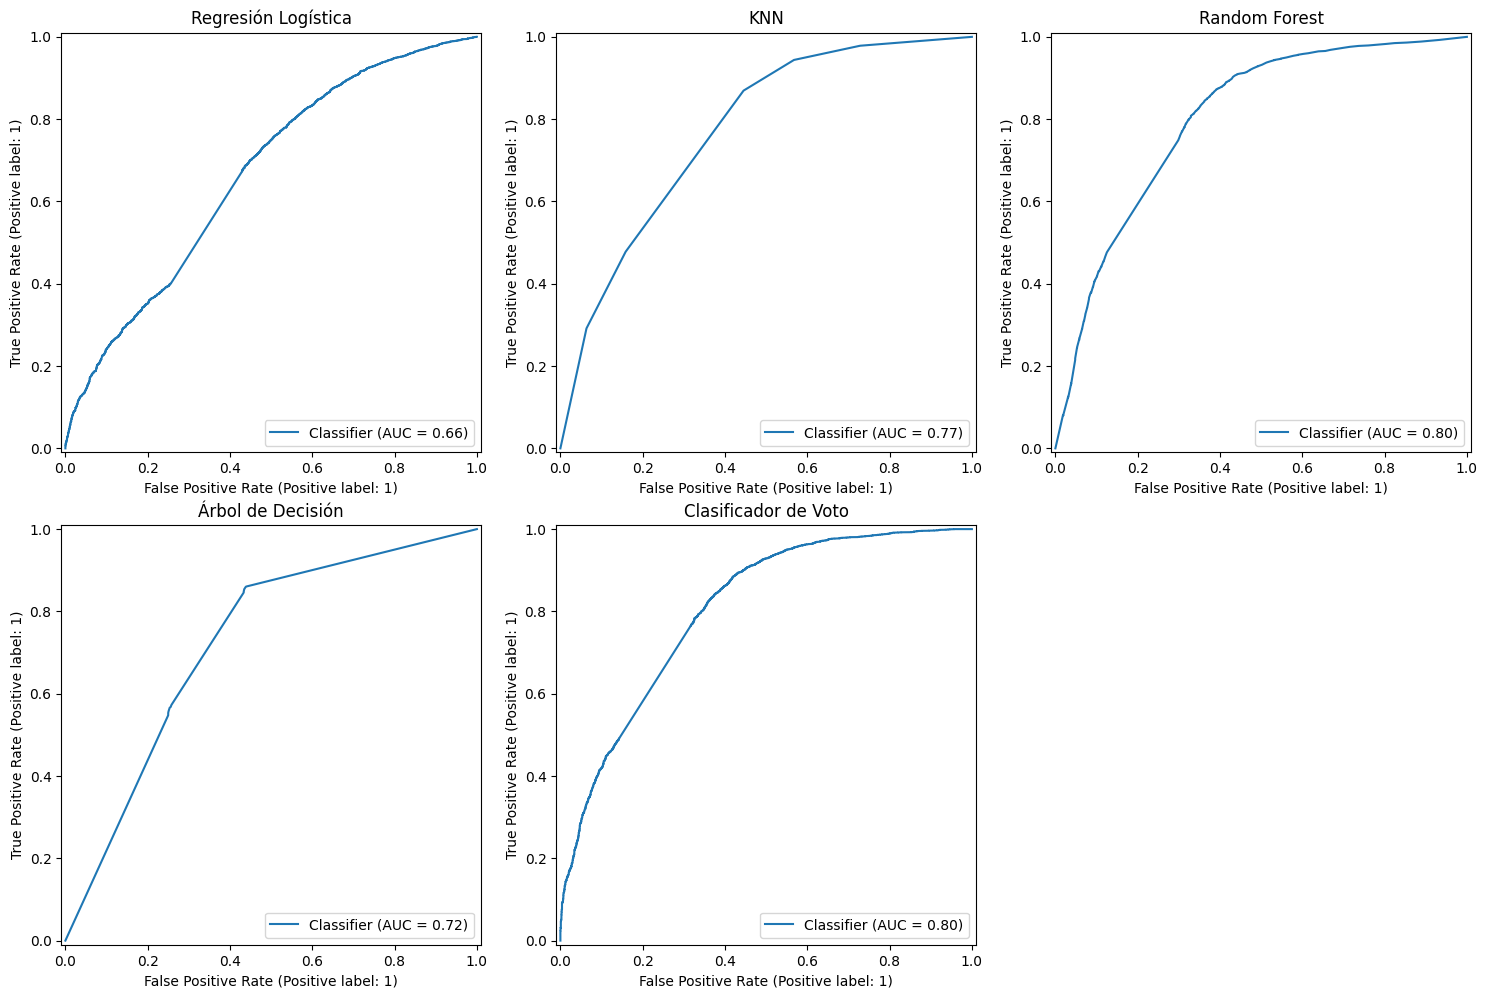

AUC Scores:
Regresión Logística: 0.6635557488500953
KNN: 0.7731472083525813
Random Forest: 0.8009693952808717
Árbol de Decisión: 0.7241059600676611
Clasificador de Voto: 0.8038110627561255


In [54]:
# Obtener las probabilidades de predicción
predictionLogistic = algoritmo.predict_proba(X_test)  # Probabilidades de regresión logística
predictionProbKnn = modeloKnn.predict_proba(X_test)  # Probabilidades de modelo KNN
predictionProbRandom = modeloRandom.predict_proba(X_test)  # Probabilidades de modelo Random Forest
predictionProbArbol = modeloArbol.predict_proba(X_test)  # Probabilidades de modelo Árbol
predictionProbVoto = modeloVoto.predict_proba(X_test)  # Probabilidades de modelo de voto

# Crear figura
fig = plt.figure(figsize=[15, 10])

# Crear subgráficos
ax1 = fig.add_subplot(2, 3, 1)
ax1.set_title('Regresión Logística')
ax2 = fig.add_subplot(2, 3, 2)
ax2.set_title('KNN')
ax3 = fig.add_subplot(2, 3, 3)
ax3.set_title('Random Forest')
ax4 = fig.add_subplot(2, 3, 4)
ax4.set_title('Árbol de Decisión')
ax5 = fig.add_subplot(2, 3, 5)
ax5.set_title('Clasificador de Voto')

# Graficar las curvas ROC
RocCurveDisplay.from_predictions(y_test, predictionLogistic[:, 1], pos_label=1, ax=ax1)
RocCurveDisplay.from_predictions(y_test, predictionProbKnn[:, 1], pos_label=1, ax=ax2)
RocCurveDisplay.from_predictions(y_test, predictionProbRandom[:, 1], pos_label=1, ax=ax3)
RocCurveDisplay.from_predictions(y_test, predictionProbArbol[:, 1], pos_label=1, ax=ax4)
RocCurveDisplay.from_predictions(y_test, predictionProbVoto[:, 1], pos_label=1, ax=ax5)

plt.tight_layout()
plt.show()

# Calcular y mostrar AUC para cada modelo
print("AUC Scores:")
print("Regresión Logística:", roc_auc_score(y_test, predictionLogistic[:, 1]))
print("KNN:", roc_auc_score(y_test, predictionProbKnn[:, 1]))
print("Random Forest:", roc_auc_score(y_test, predictionProbRandom[:, 1]))
print("Árbol de Decisión:", roc_auc_score(y_test, predictionProbArbol[:, 1]))
print("Clasificador de Voto:", roc_auc_score(y_test, predictionProbVoto[:, 1]))

## Experimentación de clasificadores no supervisados

In [55]:
df2

,Veloc,Acele,Des_x,Des_y,Des_z,Presn,VelPr,AcePr,F5EEX,F6EES,...,F20MH,F1EBX,F2EBS,F4EBX,F3EBS,01_C,02_A,04_M,TimeWindow,User
0,0.187215,0.116591,0.237455,0.184453,0.059185,0.652482,0.160000,0.125000,0.564514,0.398146,...,0.346496,0.386769,0.576027,0.403027,0.431355,0,0,0,v3,p08
1,0.034589,0.025905,0.039655,0.043919,0.035813,0.141844,0.080000,0.000000,0.476728,0.357497,...,0.358912,0.418433,0.456661,0.333004,0.296849,0,0,0,v3,p08
2,0.317944,0.136303,0.615017,0.219779,0.102792,0.617021,0.244444,0.225806,0.579101,0.405055,...,0.336900,0.402431,0.576599,0.394348,0.451068,0,0,0,v5,p08
3,0.074437,0.056875,0.049155,0.066086,0.118550,0.157447,0.111111,0.032258,0.450917,0.296017,...,0.364443,0.417201,0.455368,0.314670,0.270567,0,0,0,v5,p08
4,0.363830,0.225144,0.544567,0.251853,0.145280,0.592705,0.264151,0.244444,0.554224,0.393806,...,0.345273,0.399216,0.574096,0.391314,0.407374,0,0,0,v7,p08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.219840,0.225870,0.504518,0.205583,0.080871,0.590909,0.281991,0.210386,0.428788,0.356770,...,0.450609,0.303083,0.374909,0.428067,0.370855,1,0,1,v11,p08
814,0.489103,0.429406,0.829321,0.418768,0.286348,0.431818,0.206411,0.191127,0.367263,0.343874,...,0.166784,0.329715,0.331504,0.501770,0.370167,1,0,1,v11,p08
815,0.076578,0.093488,0.055197,0.131037,0.026792,0.504132,0.527625,0.422234,0.463416,0.499395,...,0.455714,0.495160,0.267697,0.442107,0.423586,1,1,0,v11,p08
816,0.146919,0.155824,0.375769,0.124906,0.020488,0.537190,0.263096,0.306680,0.395765,0.324482,...,0.393618,0.300382,0.434468,0.573484,0.555169,1,1,0,v11,p08
